## Importing Libraries and Packages

In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer

import warnings 
warnings.filterwarnings('ignore')

## Loading Data 

In [671]:
df_train = pd.read_csv('C:/Users/sanli/Desktop/Sandeep/Vokesdigital/train.csv')

In [672]:
df_train.shape

(105000, 34)

In [1219]:
# Will use these datasets while trying different models
data1_train = df_train.copy()
data2_train = df_train.copy()
data3_train = df_train.copy()
data4_train = df_train.copy()
data5_train = df_train.copy()
data1_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


#### Total number of rows are 105000 and total number of columns are 34

In [674]:
df_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [675]:
# Reading test data
df_test = pd.read_csv('C:/Users/sanli/Desktop/Sandeep/Vokesdigital/test.csv')

In [676]:
df_test.shape

(42000, 33)

In [1220]:
# Will use these datasets while trying different models
data1_test = df_test.copy()
data2_test = df_test.copy()
data3_test = df_test.copy()
data4_test = df_test.copy()
data5_test = df_test.copy()

In [992]:
df_test.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,College/University,White,United-States,Some college but no degree,Householder,Manufacturing-nondurable goods,...,NaN,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Full-time schedules
1,105001,2004,0,2,College/University,White,United-States,Bachelors degree(BA AB BS),Nonfamily householder,Medical except hospital,...,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
2,105002,2004,0,2,NaN,White,United-States,7th and 8th grade,In group quarters,Not in universe or children,...,Yes,NaN,0,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces
3,105003,2004,2,2,NaN,White,United-States,High school graduate,Secondary individual,Manufacturing-nondurable goods,...,No,No,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
4,105004,2004,0,2,NaN,White,Iran,Doctorate degree(PhD EdD),Householder,Public administration,...,Yes,No,47,NaN,0.0,NaN,FB_US,Loc_Govt,Single,Children/Armed_Forces


## Descriptive Statistics

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

### Observations
#### 1. currently_enrolled, labour_union , major_occ_code, house_1yr_ago, income_filled, under18, unemp_reason, woker_type and full_partime_job has missing values
#### 2. We have data with int, float and object data dtypes

### a. Descriptive Statistics Data for Numberical variables

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,105000.0,52499.500000,30311.033470,0.0,26249.75,52499.5,78749.25,104999.0
year_of_poll,105000.0,2004.500305,0.500002,2004.0,2004.00,2005.0,2005.00,2005.0
own_self_emp,105000.0,0.176800,0.555648,0.0,0.00,0.0,0.00,2.0
veteran benefits,105000.0,1.517305,0.850049,0.0,2.00,2.0,2.00,2.0
age,105000.0,36.243924,23.465922,0.0,16.00,35.0,52.00,94.0
gains,105000.0,488.464764,5284.877430,0.0,0.00,0.0,0.00,109998.9
dividends,105000.0,240.232046,2501.629980,0.0,0.00,0.0,0.00,119998.8
losses,105000.0,25.321047,186.824899,0.0,0.00,0.0,0.00,3225.6
employer_of,105000.0,1.953057,2.361890,0.0,0.00,1.0,4.00,6.0
weeks_worked,105000.0,20.898371,22.041670,0.0,0.00,7.0,47.00,47.0


### Observation
#### 1. The minimum and maximum age of people in the dataset is 0 and 94 years respectively, while the average age is 36.  min age indicates few of the people havn't filled their age in survey
#### 2. The minimum average gain is 0, maximum is 109998.9. This seems odd, maybe some error within the data collection.
#### 3. The minimum average dividents is 0, maximum is 119998.8. This seems odd, maybe some error within the data collection.
#### 4. gains, losses and diviidends attributes that uncovere information about the capital conditions of the people. Here we observe high differences as indicated by the max, min and standard deviation. Also, majority of people has value 0 which might indicate that they don't have investment capital.
#### 4. The number of weeks worked between 0 to 47 and the average being 7 weeks.
#### 5. Hourly wage goes from 0 to 16998.3 with the mean of 93.4, seems bit odd. May be there is an error is data collection like gains and loss

### b. Descriptive Statistics Data for Categorical variables

In [12]:
cat_cols = ['currently_enrolled', 'race', 'father_country','educ','house_stat','major_ind_code','labour_union','self_country',
       'major_occ_code', 'mother_country', 'gender', 'house_summary','hisp_origin','marriage_status','house_1yr_ago','income_filled',
           'under18','unemp_reason','citizenship','woker_type','fed_liability','full_partime_job','income']
df_train[cat_cols].describe().T

,count,unique,top,freq
currently_enrolled,73557,2,College/University,42386
race,105000,5,White,88078
father_country,105000,43,United-States,83720
educ,105000,17,High school graduate,25608
house_stat,104989,31,Householder,28081
major_ind_code,105000,24,Not in universe or children,53055
labour_union,69669,2,no,59270
self_country,105000,43,United-States,93022
major_occ_code,51945,14,Adm support including clerical,7708
mother_country,105000,43,United-States,84324


### Observation
#### 1. 70% of people enrolled in either College/University or School out of which 57% are enrolled in College/University.
#### 2. Mother country, Father Country and Self country all have 43 unique values, and almost 79% of the people from United States.
#### 2. Around 25000 people who took survey are High School graduates
#### 3. Number of females who took survey is higher the men
#### 4. Around 93000 people who take survey are US citizens

## Data Cleanup

### Checking Duplicate Values

In [13]:
df_train['father_country'].value_counts()

 United-States                   83720
 Mexico                           5297
 ?                                3523
 Puerto-Rico                      1455
 Italy                            1189
 Germany                           741
 Canada                            704
 Dominican-Republic                679
 Poland                            645
 Philippines                       616
 Cuba                              593
 El-Salvador                       519
 China                             434
 England                           403
 Columbia                          320
 South Korea                       288
 India                             280
 Ireland                           258
 Jamaica                           247
 Vietnam                           242
 Guatemala                         239
 Japan                             209
 Ecuador                           197
 Portugal                          197
 Haiti                             193
 Nicaragua               

In [14]:
# Checking if we have duplicate values in data

df_train.duplicated().sum()

0

In [15]:
df_test.duplicated().sum()

0

#### We don't have any duplicate values in dataset

### Checking null values

In [16]:
# Checking null values in training data

df_train.isnull().sum()

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled     31443
race                       0
father_country             0
educ                       0
house_stat                11
major_ind_code             0
labour_union           35331
self_country               0
major_occ_code         53055
age                        0
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          53322
income_filled          32403
weeks_worked               0
under18                76016
hourly_wage                0
unemp_reason          101811
citizenship                0
woker_type             52835
fed_liability              0
full_partime_job        1392
income                     0
dtype: int64

In [17]:
# Impute numeric missing values by 'Missing'
df_train.fillna('Missing', inplace=True)

In [18]:
df_train.isnull().sum()

ID                    0
year_of_poll          0
own_self_emp          0
veteran benefits      0
currently_enrolled    0
race                  0
father_country        0
educ                  0
house_stat            0
major_ind_code        0
labour_union          0
self_country          0
major_occ_code        0
age                   0
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
house_1yr_ago         0
income_filled         0
weeks_worked          0
under18               0
hourly_wage           0
unemp_reason          0
citizenship           0
woker_type            0
fed_liability         0
full_partime_job      0
income                0
dtype: int64

In [19]:
# Checking null values in test data

df_test.isnull().sum()

ID                        0
year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled    12613
race                      0
father_country            0
educ                      0
house_stat                3
major_ind_code            0
labour_union          14337
self_country              0
major_occ_code        21068
age                     596
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago         21398
income_filled         13008
weeks_worked              0
under18               30340
hourly_wage               0
unemp_reason          40715
citizenship               0
woker_type            20977
fed_liability             0
full_partime_job        568
dtype: int64

In [20]:
# Impute numeric missing values by 'Missing'
df_test.fillna('Missing', inplace=True)

In [21]:
df_test.isnull().sum()

ID                    0
year_of_poll          0
own_self_emp          0
veteran benefits      0
currently_enrolled    0
race                  0
father_country        0
educ                  0
house_stat            0
major_ind_code        0
labour_union          0
self_country          0
major_occ_code        0
age                   0
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
house_1yr_ago         0
income_filled         0
weeks_worked          0
under18               0
hourly_wage           0
unemp_reason          0
citizenship           0
woker_type            0
fed_liability         0
full_partime_job      0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

### 1. Income(Target Variable) distribution

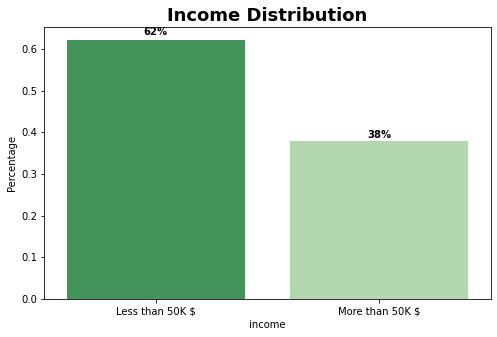

In [22]:
#sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution', fontsize=18, fontweight='bold')
eda_percentage = df_train['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

### Observation
#### 1. Only 38% of the number of people earning more than 50K dollars an year.
#### 2. We should also keep in mind that this data was collected in 2004 and 2005, so 50K dollars of that tme, might not be the same in today's time!

### 2. Distribution of Continous Variable

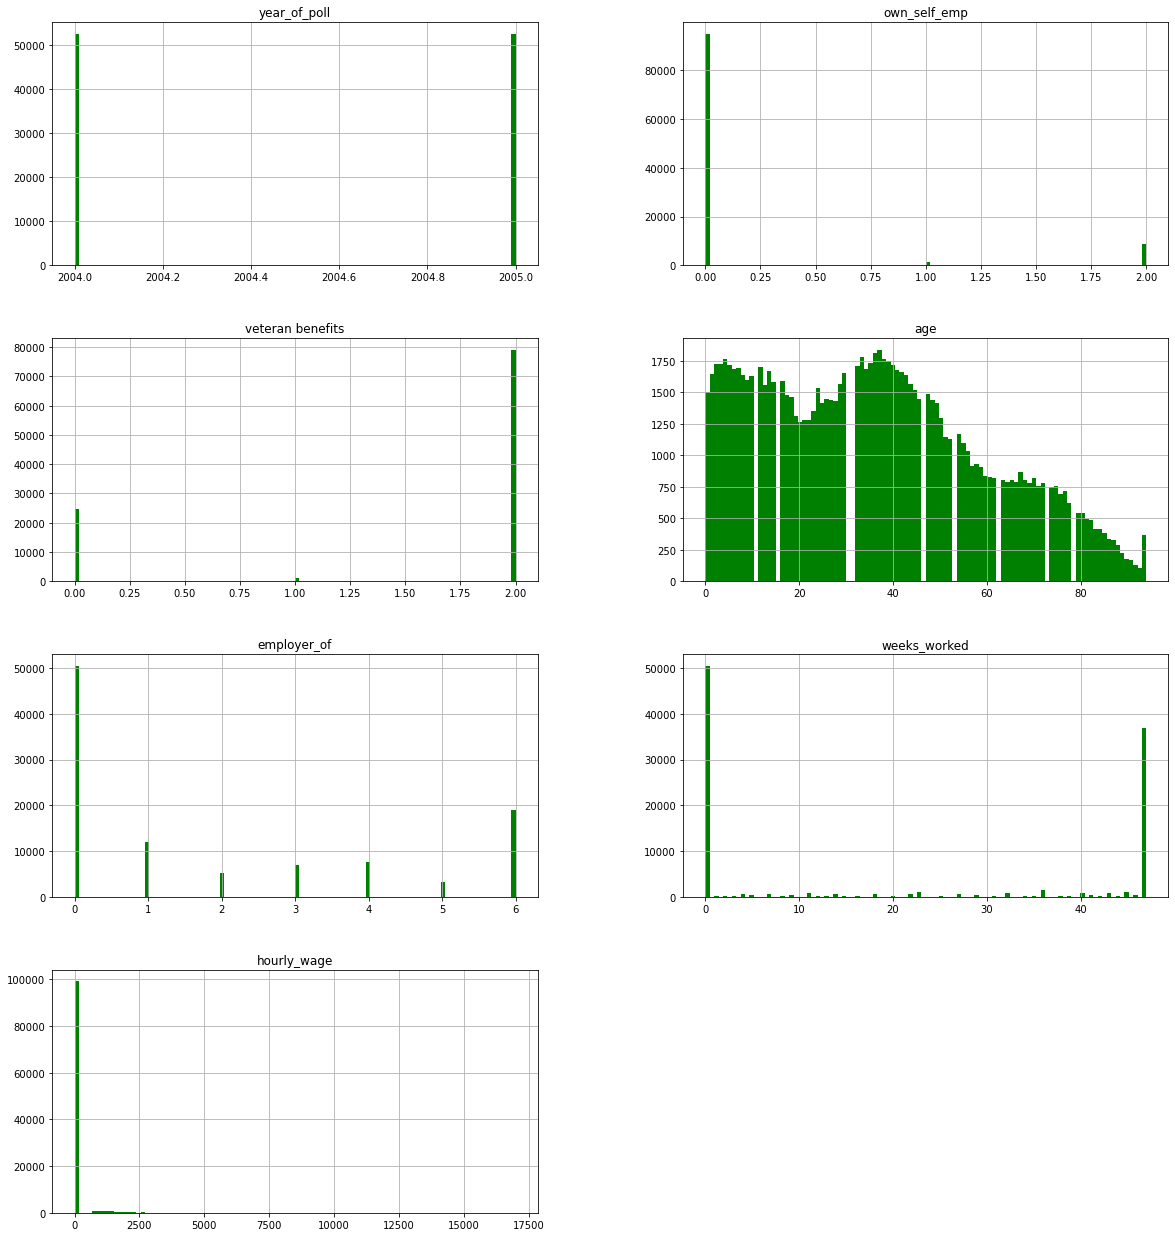

In [23]:
numeric_columns = ['year_of_poll','own_self_emp','veteran benefits','age','employer_of','weeks_worked','hourly_wage']
df_train[numeric_columns].hist(stacked=True, bins=100, figsize=(20,80), layout=(14,2),color="Green"); 


### Observation
#### 1. Poll data is collected from 2 years 2004 and 2005
#### 2. Approx 95000 people are unemployed, approx 1000 own business and approx 8000 are self employed
#### 3. Approx 25000 people do not have any benefits, approx 1000 have Cadre1 benefit and approx 79000 have Cadre2 Benefits
#### 4. We can see two peaks in Age distribution which means there are 2 modes in age, approx 1750 people have age 5 years and approx 1770 people have age 35-36
#### 5. Approx 50000 people do not have any employee, approx 11000 have 1 employee, number of people who have 2,3,4 and 5 employees are less than 10000. Approx 19000 people have 6 employees under them.
#### 6. 50000 people have 0 as weeks worked, which can mean they may be unemployed. The number of people who have worked 0-45 hours are less than 1000 each. Aprrox 36500-37000 people have 47 work hours.
#### 7. Approx 99000 people have 0 hourly wage and rest of the people have wages distributed across. 625 to 1900. If we remove people with 0 hourly wage we can see true distribution of hourly wage.


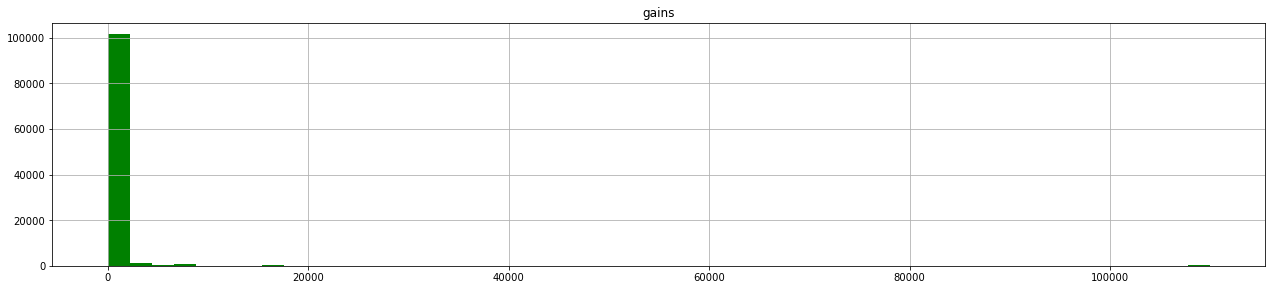

In [24]:
numeric_columns = ['gains']
df_train[numeric_columns].hist(stacked=False, bins=50, figsize=(50,80), layout=(14,2),color='Green');

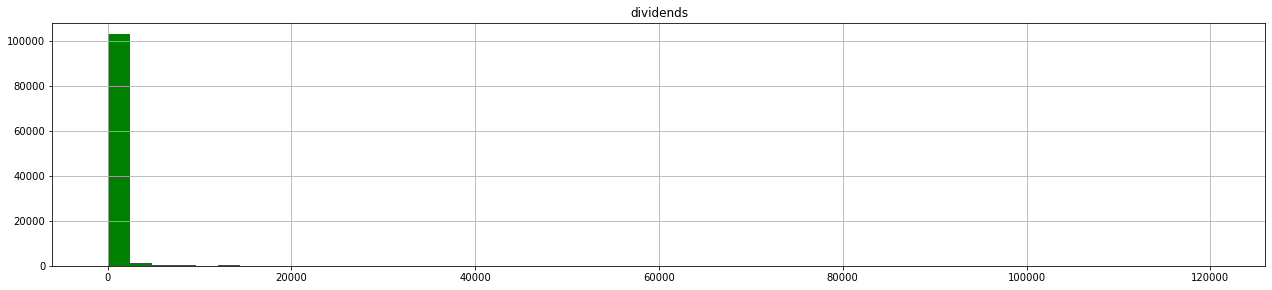

In [25]:
numeric_columns = ['dividends']
df_train[numeric_columns].hist(stacked=False, bins=50, figsize=(50,80), layout=(14,2),color='Green');

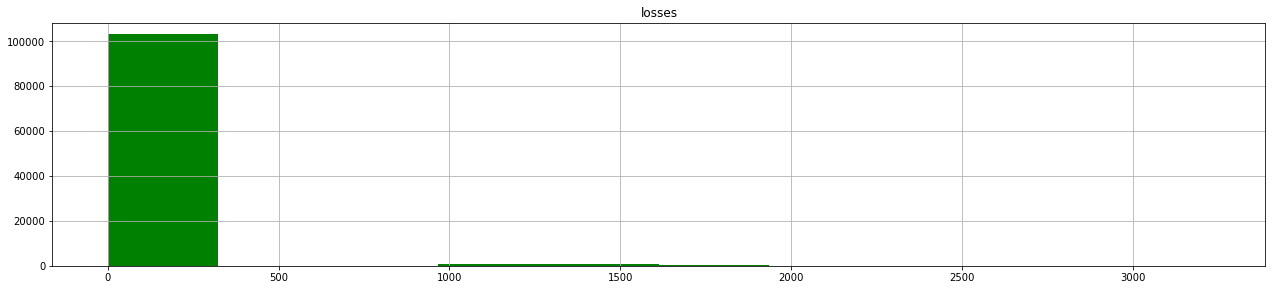

In [26]:
numeric_columns = ['losses']
df_train[numeric_columns].hist(stacked=False, bins=10, figsize=(50,80), layout=(14,2),color='Green');

 #### Observation
 #### 1. Gains, Dividends and Losses, the data is highly left skewed which needs to be tackled.

### Bivariate Analysis

### 1. Categorical variable relationship with Target variable i.e. Income

In [27]:
cat_cols = ['currently_enrolled', 'race', 'father_country','educ','house_stat','major_ind_code','labour_union','self_country',
       'major_occ_code', 'mother_country', 'gender', 'house_summary','hisp_origin','marriage_status','house_1yr_ago','income_filled',
           'under18','unemp_reason','citizenship','woker_type','fed_liability','full_partime_job','income']

### Income v/s currently enorlled

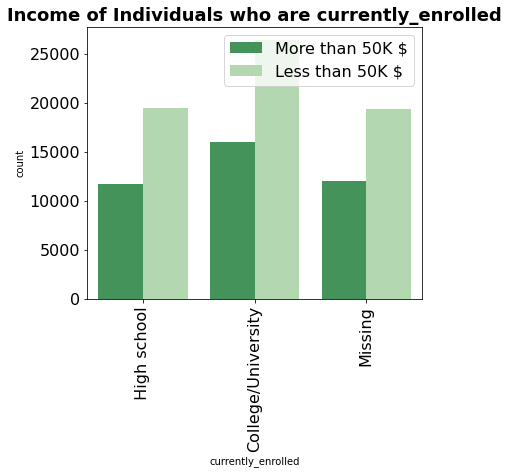

In [28]:
plt.figure(figsize=(6,5))
sns.countplot(df_train['currently_enrolled'], hue = df_train['income'], palette='Greens_r')
plt.title('Income of Individuals who are currently_enrolled', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

#### In all three case we can people who are <50K is higher than the people earling >50K.
#### People with missing information has approx same number of people earning <50 K and > 50K as the people who are enrolled in High School

### Income v/s Race

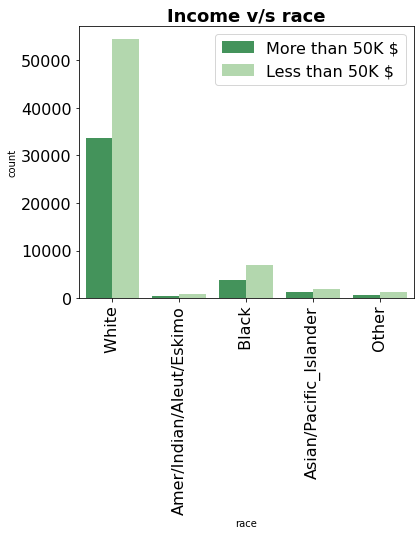

In [29]:
plt.figure(figsize=(6,5))
sns.countplot(df_train['race'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s race', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Observation
#### 1. An important point to notice over here is that, except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.
#### 2. All races other than White are very few so we will later combine them with Other 

### Income v/s father country

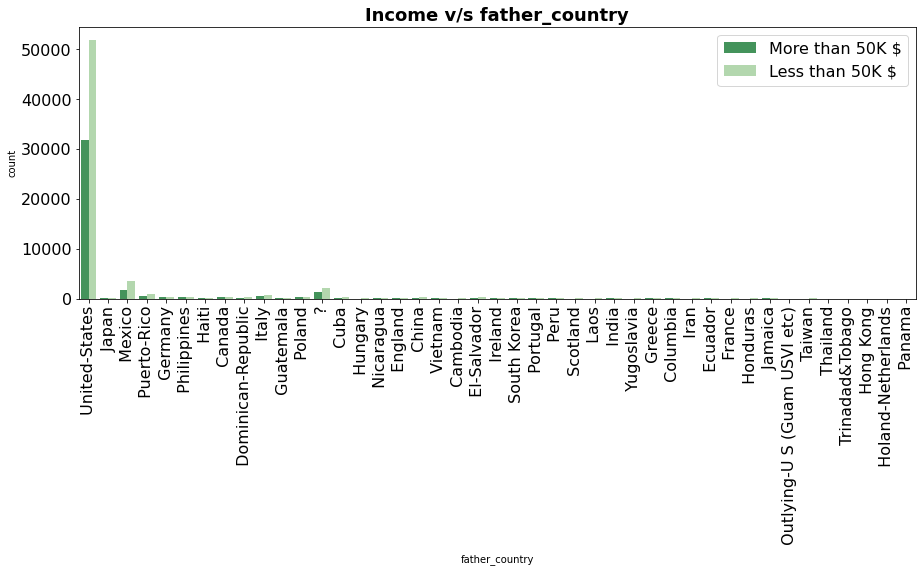

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['father_country'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s father_country', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Income v/s self country

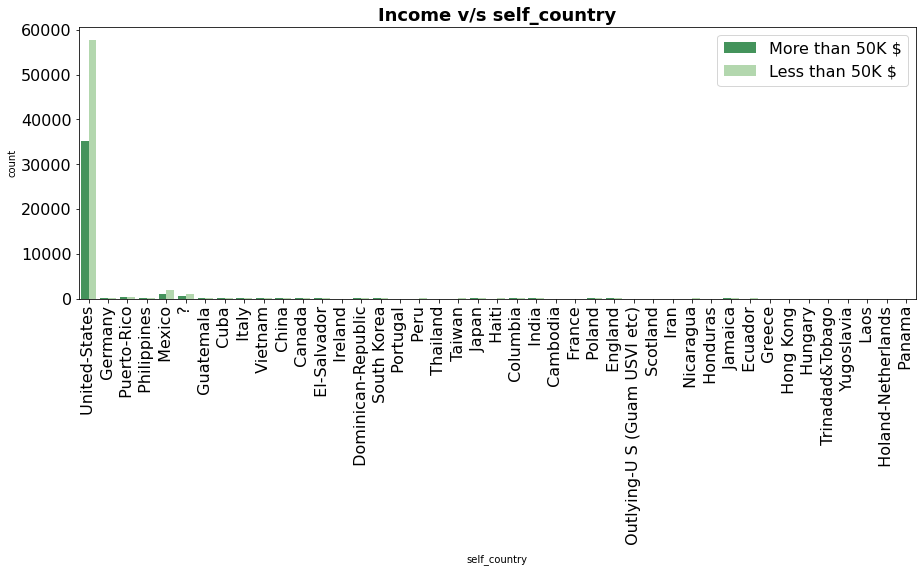

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['self_country'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s self_country', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Income v/s monther country

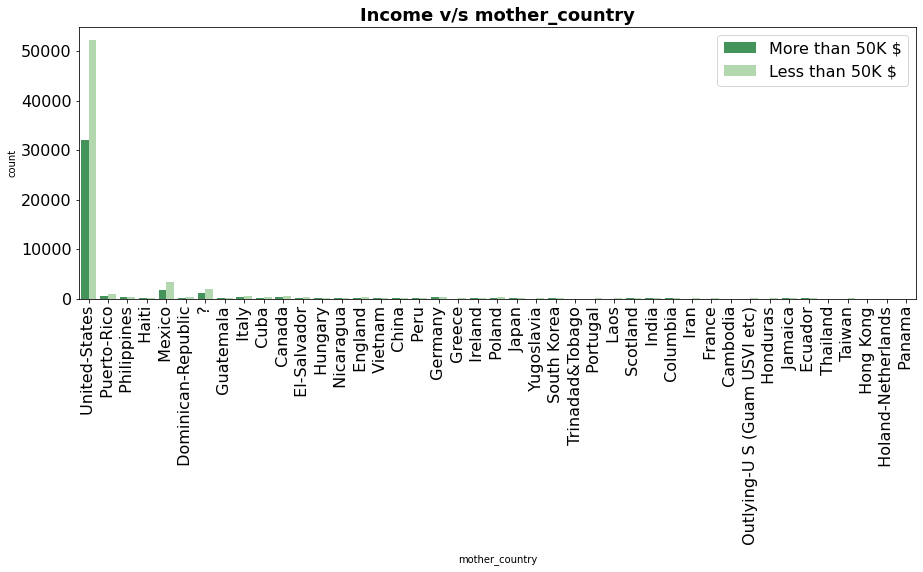

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['mother_country'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s mother_country', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Observations
#### 1. There are some missing values in all three Country column denoted by ?. As they are very less, I’ll drop these rows.
#### 2. The majority of adults are from United States. Thus, we can distribute the column with values as either United-States or Other.

### Income v/s educ 

In [33]:
df_train['educ'].value_counts()

 High school graduate                      25608
 Children                                  24831
 Some college but no degree                14637
 Bachelors degree(BA AB BS)                10403
 7th and 8th grade                          4239
 10th grade                                 3962
 11th grade                                 3611
 Masters degree(MA MS MEng MEd MSW MBA)     3471
 9th grade                                  3275
 Associates degree-occup /vocational        2857
 Associates degree-academic program         2289
 5th or 6th grade                           1735
 12th grade no diploma                      1082
 1st 2nd 3rd or 4th grade                    963
 Prof school degree (MD DDS DVM LLB JD)      937
 Doctorate degree(PhD EdD)                   651
 Less than 1st grade                         449
Name: educ, dtype: int64

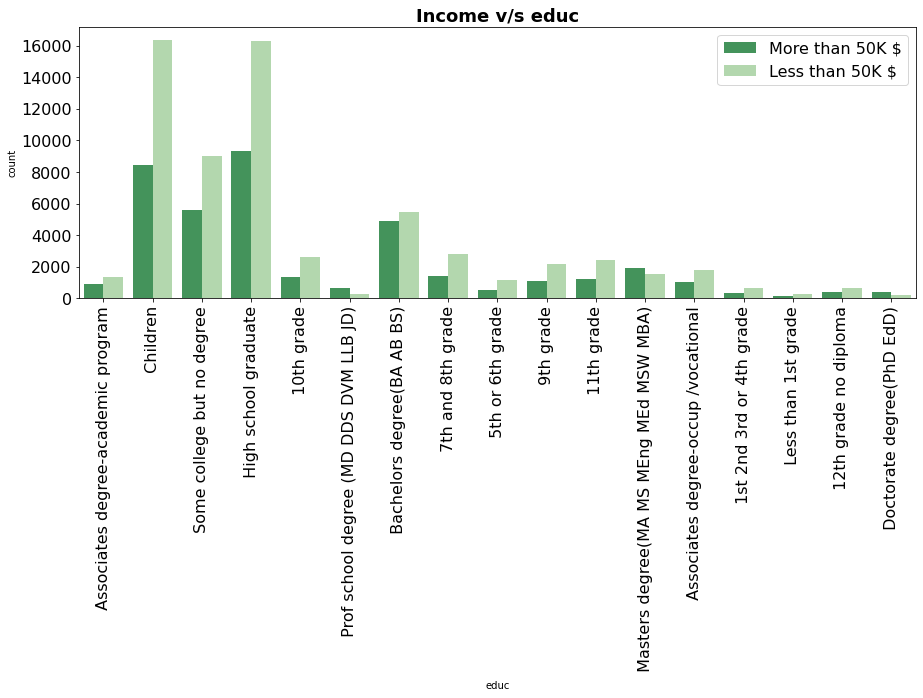

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['educ'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s educ', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Observation
#### 1. For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
#### 2. For the people belonging to  Masters degree(MA MS MEng MEd MSW MBA), Associates degree-occup /vocational category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
#### 3. We can combine people from Chidren to 12 Standard in one category as they donot have college level education

### Income v/s house_state

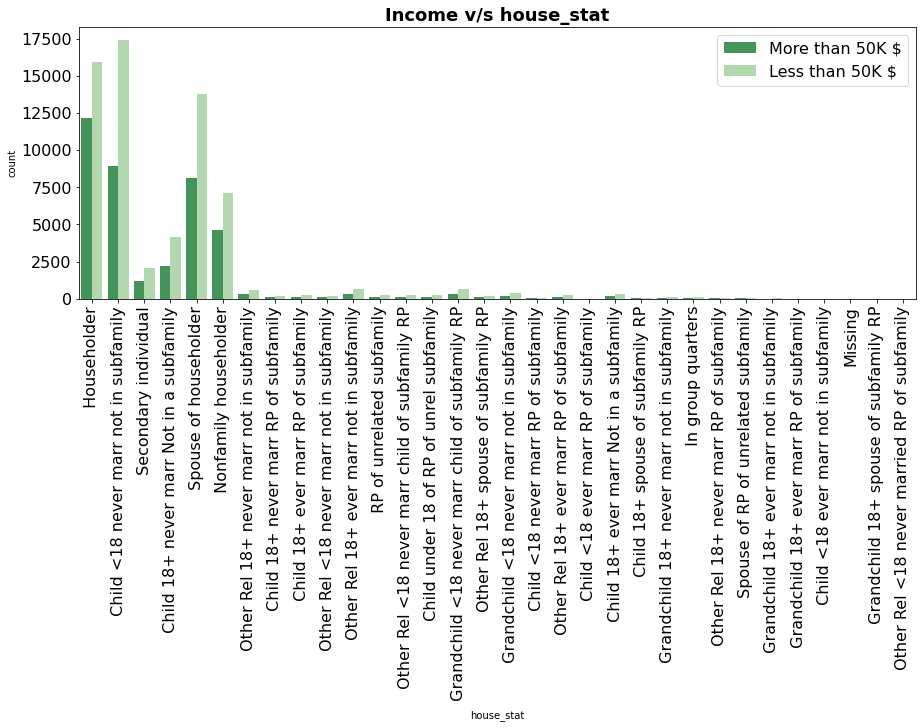

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['house_stat'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s house_stat', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Observation
#### Except HouseHolder, Child<18 never marr not in subfamily, secondry individuals,  Child 18+ never marr not in subfamily, spouse of housesubholder, Nonfamily householder categories all other category have very less number of people so we can combine all them in Other category and we can even remove last few categories which do no show any values.

### Income v/s house_summary

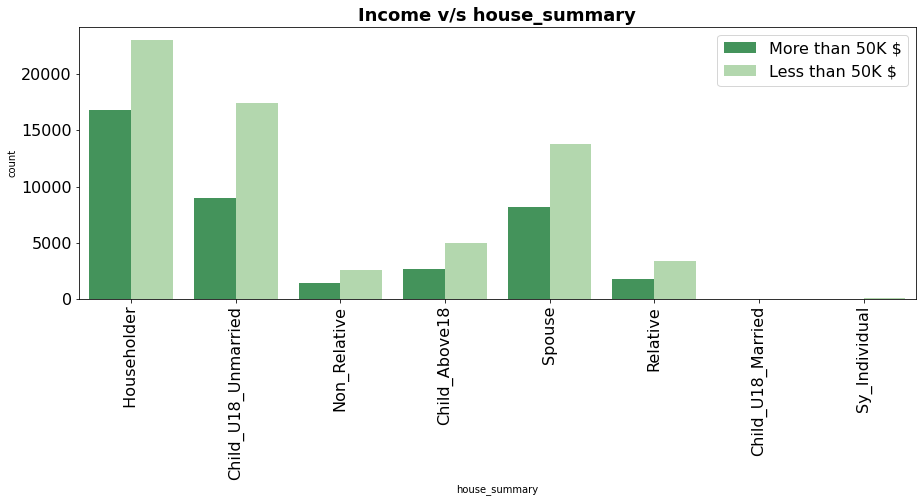

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['house_summary'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s house_summary', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

In [37]:
print(df_train['house_stat'].value_counts())
print("\n\n")
print(df_train['house_summary'].value_counts())

 Householder                                        28081
 Child <18 never marr not in subfamily              26380
 Spouse of householder                              21940
 Nonfamily householder                              11728
 Child 18+ never marr Not in a subfamily             6320
 Secondary individual                                3224
 Other Rel 18+ ever marr not in subfamily             997
 Grandchild <18 never marr child of subfamily RP      980
 Other Rel 18+ never marr not in subfamily            929
 Child 18+ ever marr Not in a subfamily               547
 Grandchild <18 never marr not in subfamily           542
 Child under 18 of RP of unrel subfamily              390
 RP of unrelated subfamily                            388
 Other Rel 18+ ever marr RP of subfamily              386
 Child 18+ ever marr RP of subfamily                  350
 Other Rel <18 never marr child of subfamily RP       348
 Other Rel <18 never marr not in subfamily            316
 Child 18+ nev

### Observations
#### 1. House_stat and house_summary both columns looks related. house_summary seems the grouping of house_stat column so we can keep house_summary and drop house_stat colum


### Income v/s major_ind_code

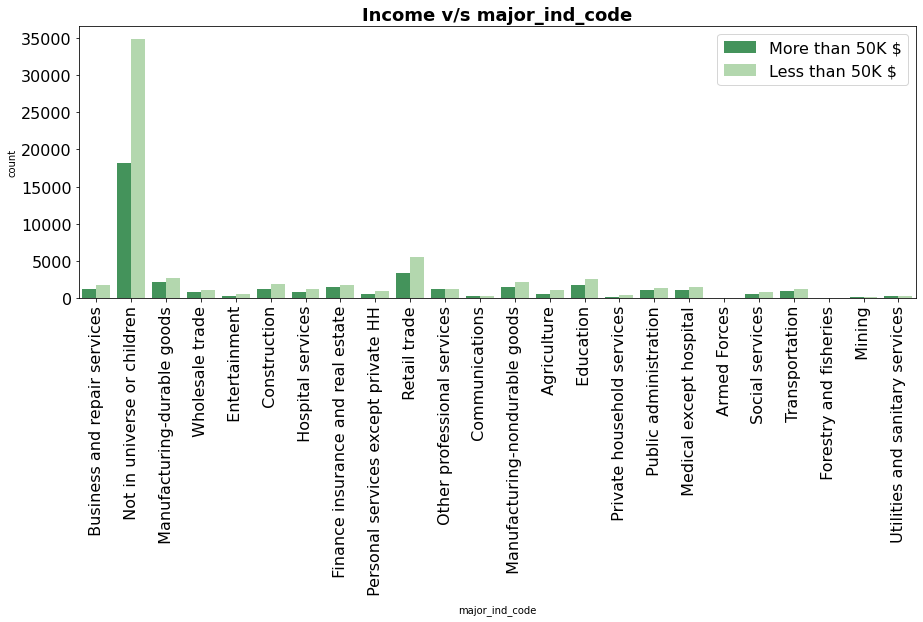

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['major_ind_code'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s major_ind_code', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### income v/s major_occ_code

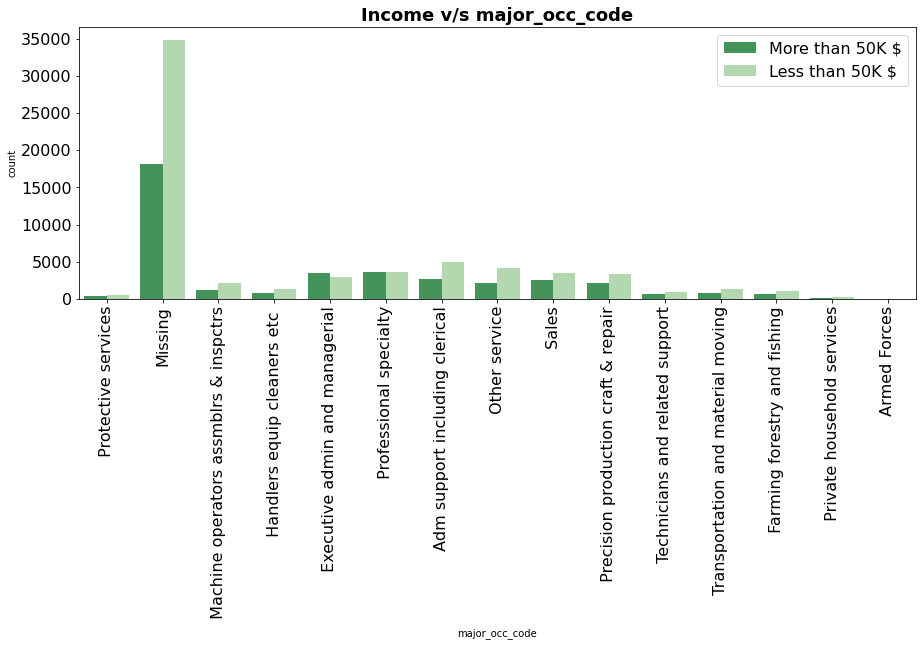

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['major_occ_code'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s major_occ_code', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Observation
#### 1. From the above two graphs we can conclude people with category Not in unvierse or children have no occupation mentioned in the data
#### 2. People who are working as Executive admin and managerial and Proffesional Specialty category, earn >50 K

### Income v/s gender

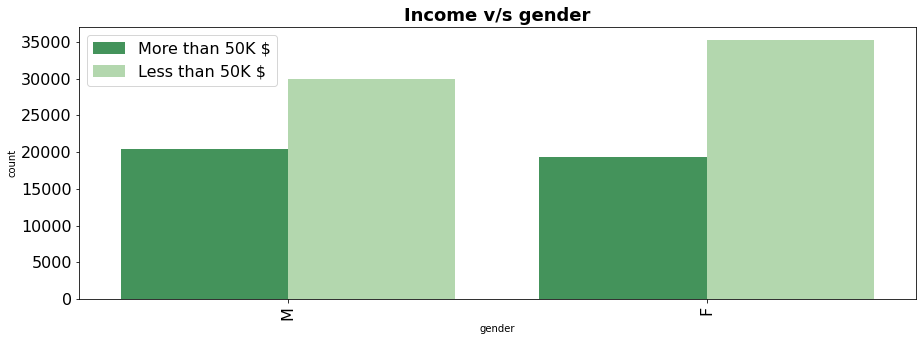

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['gender'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s gender', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Observation
#### 1. For Females, there are approx 18% of the adults earning more than 50K dollars an year.
#### 2. In case of Males there are close to 19% of them earning more than 50K dollars an year.

### Income v/s hisp_origin

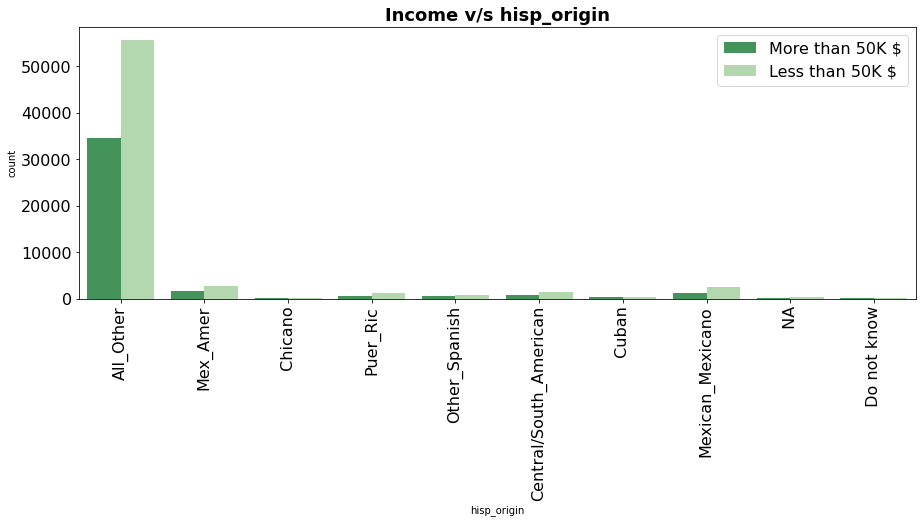

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['hisp_origin'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s hisp_origin', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Income v/s marriage_status

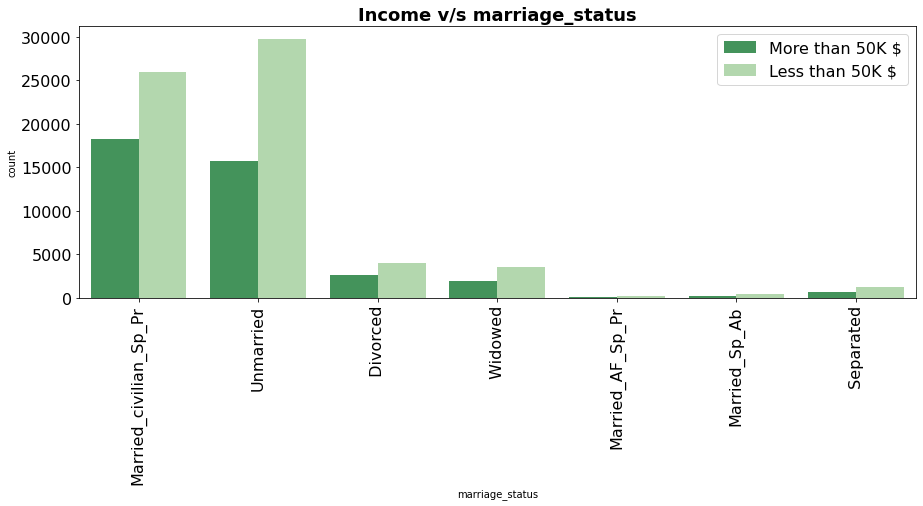

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['marriage_status'], hue = df_train['income'], palette='Greens_r')
plt.title('Income v/s marriage_status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.yticks(fontsize=16)
plt.legend(fontsize=16) 

### Income v/s house_1yr_ago','income_filled','under18','unemp_reason','citizenship','woker_type','fed_liability','full_partime_job' columns

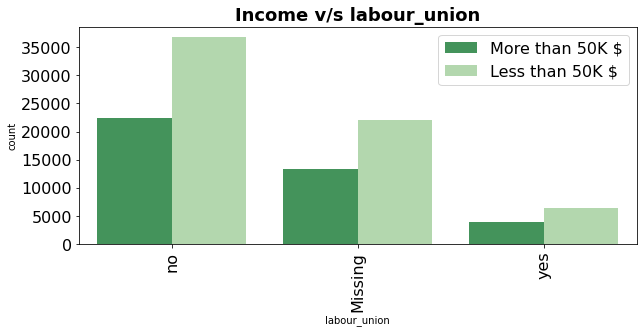

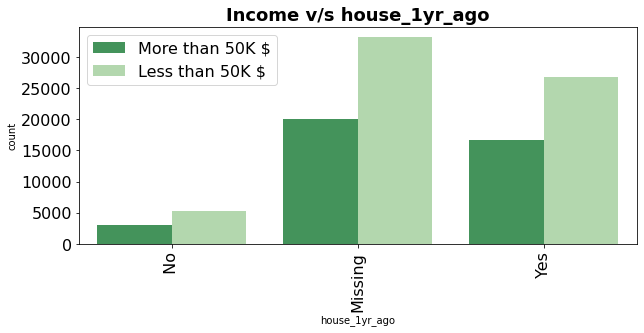

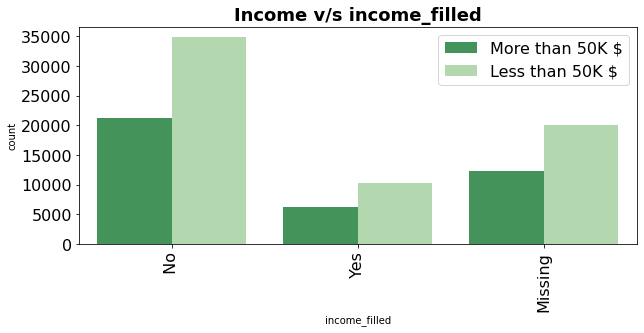

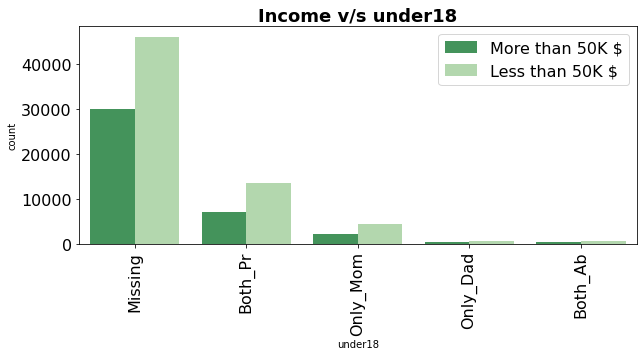

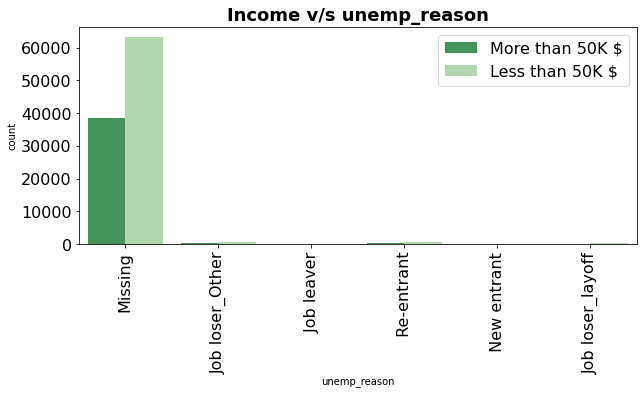

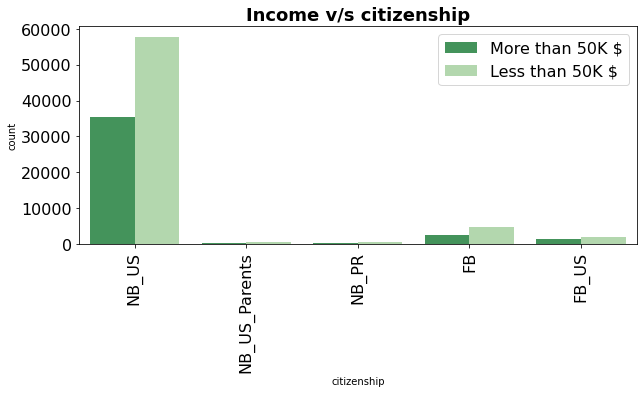

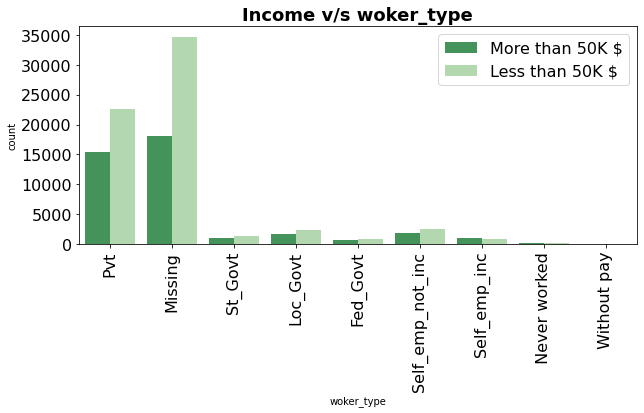

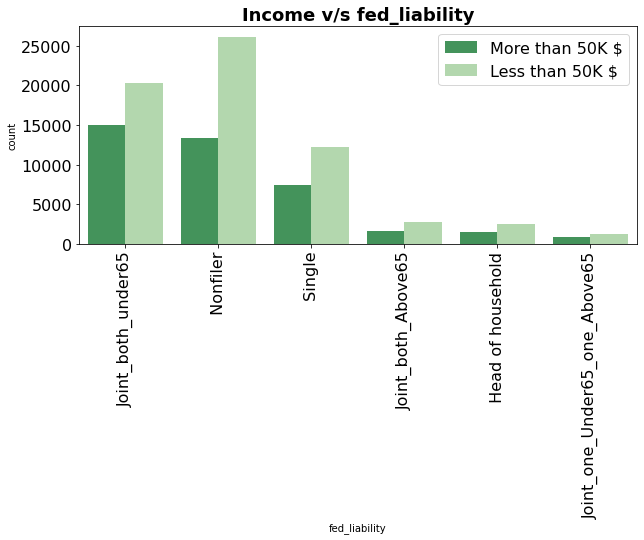

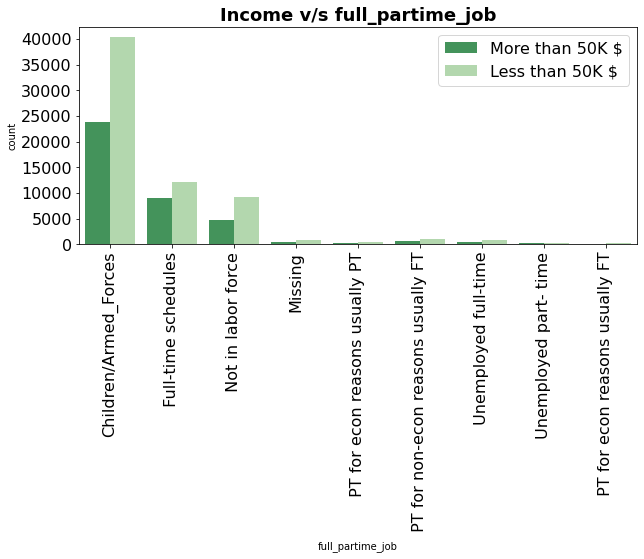

In [43]:
categorical_columns = ['labour_union','house_1yr_ago','income_filled','under18','unemp_reason','citizenship','woker_type','fed_liability','full_partime_job']
for col in categorical_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(df_train[col], hue = df_train['income'], palette='Greens_r')
    plt.title('Income v/s '+col, fontsize=18, fontweight='bold')
    plt.xticks(fontsize=16,rotation = 90)

    plt.yticks(fontsize=16)
    plt.legend(fontsize=16) 


### Observations

#### 1. Income v/s labour_union - most of the people are not a part of any union, approx 9000 people belongs to labour union
#### 2. Income v/s house_1yr_ago - approx 53000 people didn't fill any value in this category. Doesn't see relevant in predicting income
#### 3. income v/s income_filled - Most of the people who are earling >50 K have not filled their income for tax. Only 5000 people earning >50K has filled their income for tax
#### 4. income v/s under18 - people with Dad under 18 age has almost 0 income, and there is very less number of people who have mom under 18 age
#### 5. income v/s unemp_reson - approx 100000 people have not filled there reason for leaving the job, not sure this variable will help in predicting the income at all
#### 6. citizenship columns gives insight of if person is US born, people woth US citizenship earns more.38% US citizens earn >50K
#### 7. Most of the people who earn >50K have not filled their worker_type and second top most people who earn >50K are in private sectors. We can combine all Govt. work type in one group
#### 8. Approx 60000 people who filled survey has filled Children/Armed forces in full v/s part time job and out of which approx 24000 earn >50 K. This data is not sync in with the worker_type which shoes either data was filled incorrectly


### 2. Continous variable relationship with Target variable i.e. Income

### Income v/s Age

In [44]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 0 < x < 19 ):
        return "1-18"
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df_train['age_group'] = df_train['age'].apply(age_group)

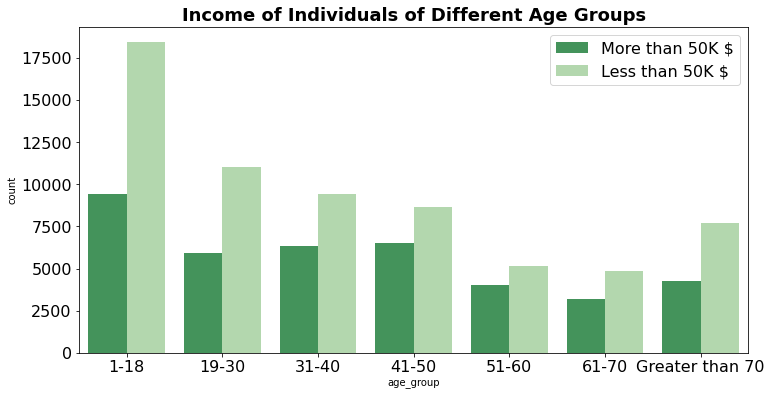

In [45]:
plt.figure(figsize=(12,6))
order_list = ['1-18','19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df_train['age_group'], hue = df_train['income'], palette='Greens_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Observation

#### 1. We make an interesting observation over here. We see that people earning more than 50K dollars increase as the age increases upto a certain extent.

#### 2. Approx 9000 people with age rangin from 1-18 earns >50K, its not sure if they filled thier own income or thier parents income
#### 3. For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it!

### Income v/s gains and losses

#### Since gain and losses are related, lets subtarct losses from gains and create a new columns difference

In [46]:
df_train['difference'] = df_train['gains'] - df_train['losses']


In [47]:
def gain(x):
    x = int(x)
    x = abs(x)
    if( 0 < x < 5001 ):
        return "Minor"
    if( 5000 < x < 150000 ):
        return "Major"

df_train['difference_group'] = df_train['difference'].apply(gain)

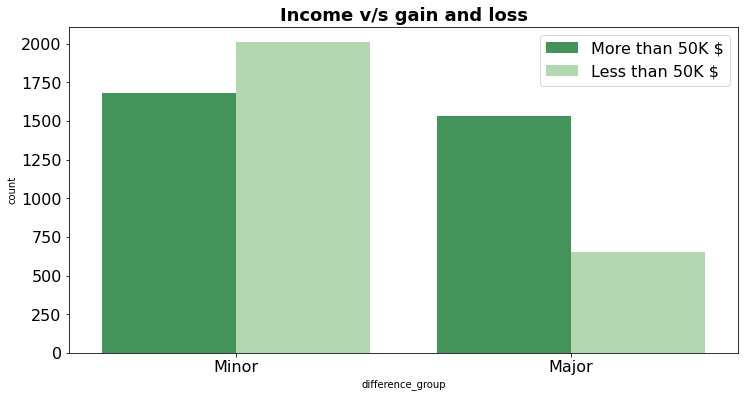

In [48]:
plt.figure(figsize=(12,6))
order_list = ['Minor','Major']
sns.countplot(df_train['difference_group'], hue = df_train['income'], palette='Greens_r', order = order_list)
plt.title('Income v/s gain and loss', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Observation

#### On taking a look at the result, I can see that for Minor there are more people with Income less than 50K and for Major thereare more people with Income greater than 50K. This is in complete agreement with the fact that people who have large Capital Gain compared to Capital Loss have Income more than 50K.

### Income v/s weeks worked

In [49]:
def week_group(x):
    x = int(x)
    x = abs(x)
    if( 0 <= x < 31 ):
        return "Less hours"
    if( 30 < x < 41 ):
        return "Normal hours"
    if( 40 < x < 50 ):
        return "Extra hours"

df_train['weeks_worked_group'] = df_train['weeks_worked'].apply(week_group)

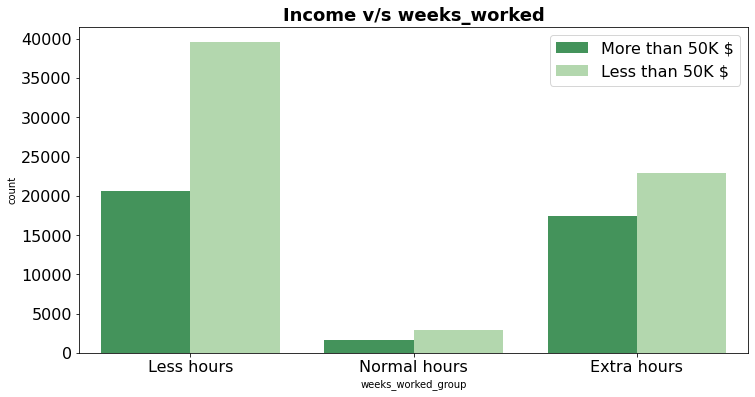

In [50]:
plt.figure(figsize=(12,6))
order_list = ['Less hours','Normal hours','Extra hours']
sns.countplot(df_train['weeks_worked_group'], hue = df_train['income'], palette='Greens_r', order = order_list)
plt.title('Income v/s weeks_worked', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Observation
#### As people spend more hours at work, they would probably be getting overtime income. This aligns with the data as well. The people with Extra Hours tend to have more percentage of individuals with salary more than 50K.

### Income v/s hourly wage

In [51]:
def hourly_group(x):
    x = int(x)
    x = abs(x)
    if( x < 1 ):
        return "No wage"
    if( 0 < x < 2900 ):
        return "Normal wage"
    if( 2901 < x ):
        return "High wage"

df_train['Hourly_wage_group'] = df_train['hourly_wage'].apply(hourly_group)

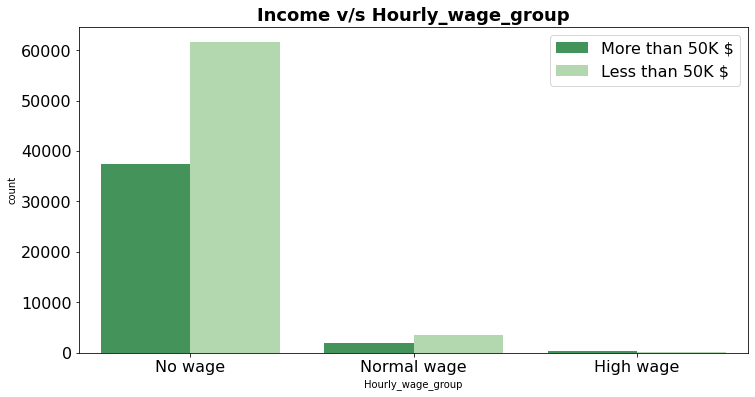

In [52]:
plt.figure(figsize=(12,6))
order_list = ['No wage','Normal wage','High wage']
sns.countplot(df_train['Hourly_wage_group'], hue = df_train['income'], palette='Greens_r', order = order_list)
plt.title('Income v/s Hourly_wage_group', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#### Approx 99000 people have hourly_wage mentioned as 0 which could mean the respective person is either employed or too yound to work. But considering the number is so high it seems the deafult data is set to 0 for this column.

### Correlation matrix for Continous variables

In [53]:
# dropping columns we created for analysis

df_train.drop('age_group', inplace = True, axis = 1)
df_train.drop('difference', inplace = True, axis = 1)
df_train.drop('weeks_worked_group', inplace = True, axis = 1)
df_train.drop('Hourly_wage_group', inplace = True, axis = 1)
df_train.drop('difference_group', inplace = True, axis = 1)

In [54]:
# id variable won;t be useful in prediction
df_train.drop('ID', inplace = True, axis = 1)

In [55]:
#df_train['income'].replace(['Less than 50K $'],0, inplace = True)
#df_train['income'].replace(['More than 50K $'],1, inplace = True)
df_train['income'].replace(to_replace=['Less than 50K $', 'More than 50K $'], value=[0, 1],inplace = True)

#df_train['income']=df_train['income'].map({'Less than 50K $': 0, 'More than 50K $': 1})

In [56]:
df_train.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,...,No,47,Missing,0.0,Missing,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,Missing,...,No,0,Both_Pr,0.0,Missing,NB_US,Missing,Nonfiler,Children/Armed_Forces,1
2,2004,0,2,Missing,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,Missing,...,Yes,47,Missing,0.0,Missing,NB_US,Pvt,Single,Children/Armed_Forces,1
3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,no,...,Missing,47,Missing,0.0,Missing,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
4,2004,0,2,Missing,White,United-States,High school graduate,Householder,Wholesale trade,no,...,Missing,47,Missing,0.0,Missing,NB_US,Pvt,Single,Children/Armed_Forces,1


No handles with labels found to put in legend.


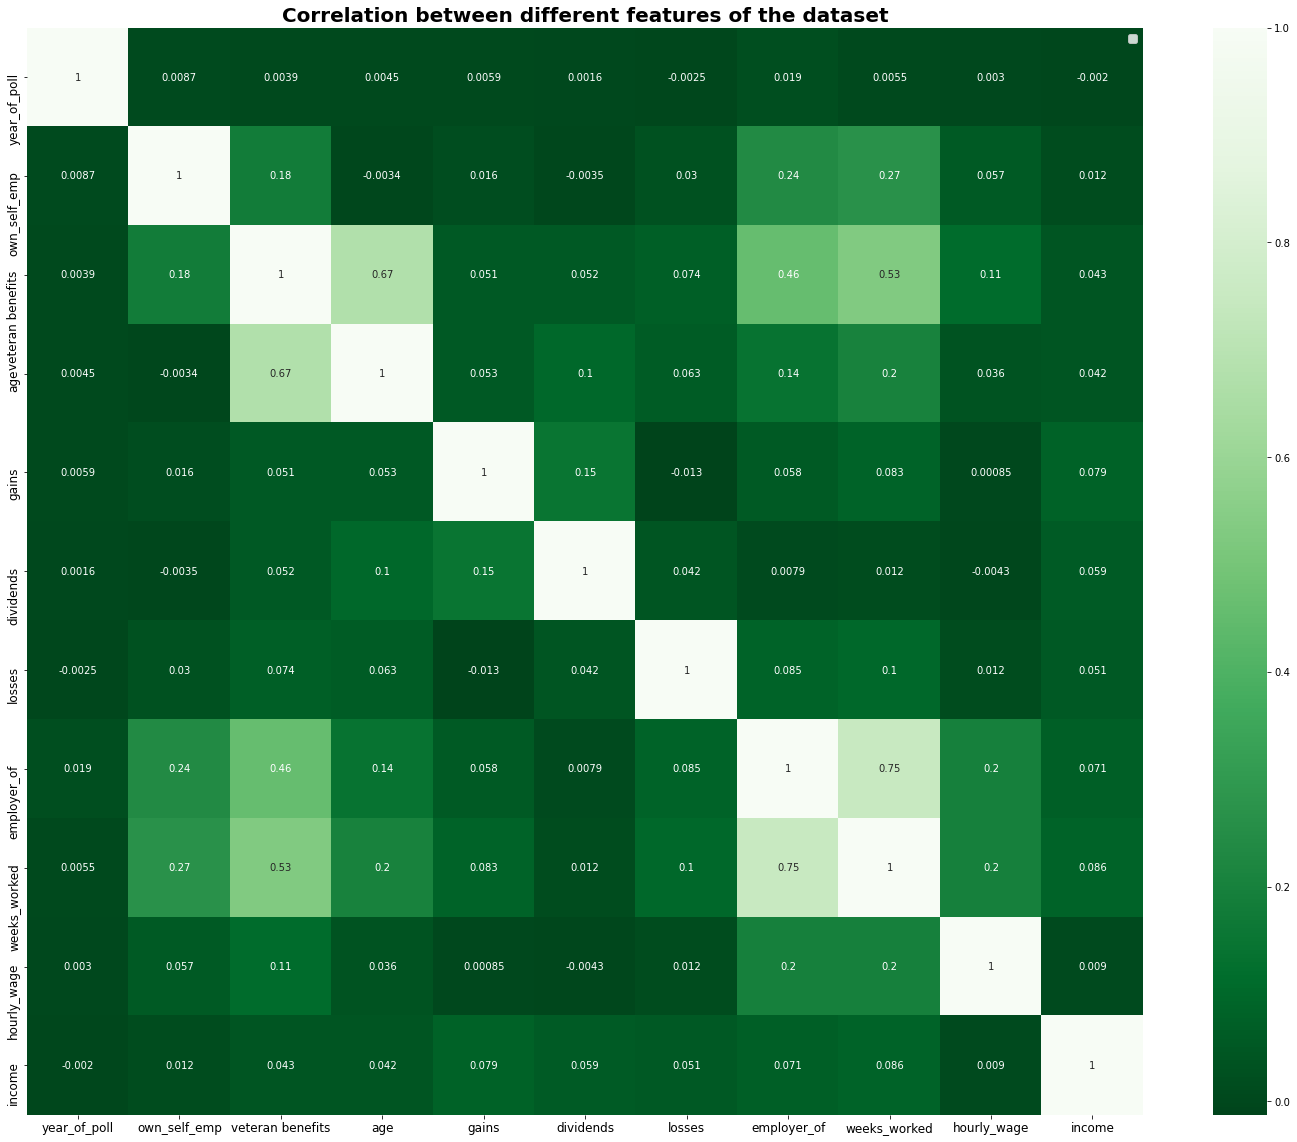

In [57]:
plt.figure(figsize = (25,20))
plt.title("Correlation between different features of the dataset", fontsize = 20, fontweight = 'bold')
sns.heatmap(df_train.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

#### Taking a look at the correlation matrix above, it’s clear that there is no high linear correlation between any of the continuous features and the target variable. Also, year of poll has zero correlation with the output class and hence, I’ll drop this column later.

# We will build model without removing any features

In [452]:
data1_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [453]:
data1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

In [454]:
#data1_train[data1_train['father_country'].str.contains('?', regex=False)]

In [455]:
data1_train['father_country']= data1_train['father_country'].str.replace("?",'nan')
data1_train['mother_country']= data1_train['mother_country'].str.replace("?",'nan')  
data1_train['self_country']= data1_train['self_country'].str.replace("?",'nan')

In [456]:
# fill missing values with mode
data1_train.fillna(data1_train.mode().iloc[0], inplace=True)

In [457]:
data1_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,College/University,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,No,47,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,College/University,White,United-States,High school graduate,Householder,Wholesale trade,...,No,47,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [458]:
data1_train['income']= data1_train['income'].map({'Less than 50K $': 0, 'More than 50K $': 1})
data1_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Nonfiler,Children/Armed_Forces,1
2,2,2004,0,2,College/University,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Single,Children/Armed_Forces,1
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,No,47,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
4,4,2004,0,2,College/University,White,United-States,High school graduate,Householder,Wholesale trade,...,No,47,Both_Pr,0.0,Re-entrant,NB_US,Pvt,Single,Children/Armed_Forces,1


In [459]:
data1_train.columns[data1_train.isnull().any()].tolist()

[]

#### No null values in data anymore

In [460]:
y1=data1_train['income']

In [461]:
data1_train=data1_train.drop(columns=['income'])

In [462]:
data1_train.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job'],
      dtype='object')

In [463]:
for i in range(1, len(data1_train.columns)):
    print(data1_train.columns[i]," has ",len(data1_train.iloc[:,i].unique()))

year_of_poll  has  2
own_self_emp  has  3
veteran benefits  has  3
currently_enrolled  has  2
race  has  5
father_country  has  43
educ  has  17
house_stat  has  31
major_ind_code  has  24
labour_union  has  2
self_country  has  43
major_occ_code  has  14
age  has  91
mother_country  has  43
house_summary  has  8
gender  has  2
hisp_origin  has  10
gains  has  125
dividends  has  1159
marriage_status  has  7
losses  has  108
employer_of  has  7
house_1yr_ago  has  2
income_filled  has  2
weeks_worked  has  48
under18  has  4
hourly_wage  has  918
unemp_reason  has  5
citizenship  has  5
woker_type  has  8
fed_liability  has  6
full_partime_job  has  8


In [464]:
# combine classes till 12 and name it is as school

string_to_replace = ['Less than 1st grade','1st 2nd 3rd or 4th grade','5th or 6th grade','7th and 8th grade','9th grade','10th grade','11th grade','12th grade no diploma','High school graduate']
for value in string_to_replace:
    data1_train['educ']= data1_train['educ'].str.replace(value,'School')

data1_train['educ'].value_counts()


 School                                    44924
 Children                                  24831
 Some college but no degree                14637
 Bachelors degree(BA AB BS)                10403
 Masters degree(MA MS MEng MEd MSW MBA)     3471
 Associates degree-occup /vocational        2857
 Associates degree-academic program         2289
 Prof school degree (MD DDS DVM LLB JD)      937
 Doctorate degree(PhD EdD)                   651
Name: educ, dtype: int64

In [465]:
string_to_replace1 = ['Mexico','nan','Puerto-Rico','Italy','Germany','Canada','Dominican-Republic','Poland','Philippines','Cuba','El-Salvador',
                    'China','England','Columbia','South Korea','India','Ireland','Jamaica','Vietnam','Guatemala','Japan','Ecuador','Portugal',
                    'Haiti','Nicaragua','Greece','Peru','Hungary','Scotland','Yugoslavia','Iran','Cambodia','France','Taiwan',
                     'Honduras','Laos','Outlying-U S (Guam USVI etc)','Trinadad&Tobago','Thailand','Hong Kong','Holand-Netherlands','Panama']
for value in string_to_replace1:
    data1_train['father_country']= data1_train['father_country'].str.replace(value,'Other')
    data1_train['mother_country']= data1_train['father_country'].str.replace(value,'Other')
    data1_train['self_country']= data1_train['father_country'].str.replace(value,'Other')

print(data1_train['father_country'].value_counts())
print(data1_train['mother_country'].value_counts())
print(data1_train['self_country'].value_counts())


 United-States                   83720
 Other                           21206
 Outlying-U S (Guam USVI etc)       74
Name: father_country, dtype: int64
 United-States                   83720
 Other                           21206
 Outlying-U S (Guam USVI etc)       74
Name: mother_country, dtype: int64
 United-States                   83720
 Other                           21206
 Outlying-U S (Guam USVI etc)       74
Name: self_country, dtype: int64


In [466]:
object_datatype_list = list(data1_train.select_dtypes(include=['object']).columns)
object_datatype_list
data1 = pd.get_dummies(data1_train, columns=object_datatype_list)

In [467]:
data1.head()

,ID,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,...,fed_liability_Joint_both_under65,fed_liability_Joint_one_Under65_one_Above65,full_partime_job_ Full-time schedules,full_partime_job_ Not in labor force,full_partime_job_ PT for econ reasons usually FT,full_partime_job_ PT for econ reasons usually PT,full_partime_job_ PT for non-econ reasons usually FT,full_partime_job_ Unemployed full-time,full_partime_job_ Unemployed part- time,full_partime_job_Children/Armed_Forces
0,0,2004,0,2,42,0.0,0.0,0.0,1,47,...,1,0,0,0,0,0,0,0,0,1
1,1,2005,0,0,10,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2004,0,2,46,0.0,0.0,0.0,6,47,...,0,0,0,0,0,0,0,0,0,1
3,3,2004,0,2,35,0.0,0.0,0.0,2,47,...,1,0,0,0,0,0,0,0,0,1
4,4,2004,0,2,61,0.0,0.0,0.0,3,47,...,0,0,0,0,0,0,0,0,0,1


In [468]:
data1.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits', 'age',
       'gains', 'dividends', 'losses', 'employer_of', 'weeks_worked',
       ...
       'fed_liability_Joint_both_under65',
       'fed_liability_Joint_one_Under65_one_Above65',
       'full_partime_job_ Full-time schedules',
       'full_partime_job_ Not in labor force',
       'full_partime_job_ PT for econ reasons usually FT',
       'full_partime_job_ PT for econ reasons usually PT',
       'full_partime_job_ PT for non-econ reasons usually FT',
       'full_partime_job_ Unemployed full-time',
       'full_partime_job_ Unemployed part- time',
       'full_partime_job_Children/Armed_Forces'],
      dtype='object', length=174)

In [469]:
xtrain1=data1

In [470]:
from sklearn.model_selection import train_test_split

In [471]:
X_train,X_test,y_train,y_test=train_test_split(xtrain1,y1,random_state=10,test_size=0.2)

In [472]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [473]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### Naive Bayes With All the features

In [474]:
from sklearn.naive_bayes import GaussianNB as NB
nb1 = NB()

In [475]:
nb1.fit(X_train,y_train)
nb1.score(X_test,y_test)

0.6276666666666667

In [476]:
y_pred_nb1 = nb1.predict(X_test)
print(roc_auc_score(y_test,y_pred_nb1))

0.5265291887438992


In [477]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nb1).ravel()
print(confusion_matrix(y_test, y_pred_nb1))

[[12395   583]
 [ 7236   786]]


### Decision Tree With all features

In [478]:
from sklearn.tree import DecisionTreeClassifier

In [479]:
dTree1 = DecisionTreeClassifier(max_depth=5)
dTree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [480]:
dTree1.score(X_test,y_test)

0.9535238095238096

In [481]:
y_pred_dTree1 = dTree1.predict(X_test)
print(roc_auc_score(y_test,y_pred_dTree1))

0.9400003550107754


In [482]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dTree1).ravel()
print(confusion_matrix(y_test, y_pred_dTree1))

[[12943    35]
 [  941  7081]]


### Bagging with all features

In [483]:
from sklearn.ensemble import BaggingClassifier
bag1=BaggingClassifier(base_estimator=dTree1) 

In [484]:
bag1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

In [485]:
bag1.score(X_test,y_test)

0.9535714285714286

In [486]:
y_pred_bag1=bag1.predict(X_test)
print(roc_auc_score(y_test,y_pred_bag1))

0.9399198724543104


In [487]:
confusion_matrix(y_test, y_pred_bag1)

array([[12949,    29],
       [  946,  7076]], dtype=int64)

### AdaBoost classifier with all features

In [488]:
regr1=RandomForestClassifier(n_estimators=200,bootstrap=False,class_weight='balanced',max_leaf_nodes=256,criterion='entropy',min_samples_leaf=47,max_depth=15,min_samples_split=4,random_state=97,n_jobs=-1)

In [489]:
clf1=AdaBoostClassifier(n_estimators = 3, base_estimator=regr1, algorithm = "SAMME.R")

In [490]:
clf1.fit(X_train ,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                         class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=15,
                                                         max_leaf_nodes=256,
                                                         min_samples_leaf=47,
                                                         min_samples_split=4,
                                                         n_estimators=200,
                                                         n_jobs=-1,
                                                         random_state=97),
                   n_estimators=3)

In [491]:
clf1.score(X_test,y_test)

0.8789523809523809

In [492]:
y_pred_clf1=clf1.predict(X_test)
print(roc_auc_score(y_test,y_pred_clf1))

0.8787868152225393


In [100]:
confusion_matrix(y_test, y_pred_clf1)

array([[11394,  1584],
       [  979,  7043]], dtype=int64)

### Fitting test data in above models

In [493]:
data1_test['father_country']= data1_test['father_country'].str.replace("?",'nan')
data1_test['mother_country']= data1_test['mother_country'].str.replace("?",'nan')  
data1_test['self_country']= data1_test['self_country'].str.replace("?",'nan')

In [494]:
# fill missing values with mode
data1_test.fillna(data1_test.mode().iloc[0], inplace=True)

In [495]:
for i in range(1, len(data1_test.columns)):
    print(data1_test.columns[i]," has ",len(data1_test.iloc[:,i].unique()))

year_of_poll  has  2
own_self_emp  has  3
veteran benefits  has  3
currently_enrolled  has  2
race  has  5
father_country  has  3
educ  has  9
house_stat  has  31
major_ind_code  has  24
labour_union  has  2
self_country  has  3
major_occ_code  has  14
age  has  90
mother_country  has  3
house_summary  has  8
gender  has  2
hisp_origin  has  10
gains  has  117
dividends  has  760
marriage_status  has  7
losses  has  102
employer_of  has  7
house_1yr_ago  has  2
income_filled  has  2
weeks_worked  has  48
under18  has  4
hourly_wage  has  546
unemp_reason  has  5
citizenship  has  5
woker_type  has  8
fed_liability  has  6
full_partime_job  has  8


In [496]:
string_to_replace = ['Less than 1st grade','1st 2nd 3rd or 4th grade','5th or 6th grade','7th and 8th grade','9th grade','10th grade','11th grade','12th grade no diploma','High school graduate']
for value in string_to_replace:
    data1_test['educ']= data1_test['educ'].str.replace(value,'School')

data1_test['educ'].value_counts()

 School                                    17808
 Children                                  10001
 Some college but no degree                 5925
 Bachelors degree(BA AB BS)                 4246
 Masters degree(MA MS MEng MEd MSW MBA)     1323
 Associates degree-occup /vocational        1133
 Associates degree-academic program          929
 Prof school degree (MD DDS DVM LLB JD)      367
 Doctorate degree(PhD EdD)                   268
Name: educ, dtype: int64

In [497]:
string_to_replace1 = ['Mexico','nan','Puerto-Rico','Italy','Germany','Canada','Dominican-Republic','Poland','Philippines','Cuba','El-Salvador',
                    'China','England','Columbia','South Korea','India','Ireland','Jamaica','Vietnam','Guatemala','Japan','Ecuador','Portugal',
                    'Haiti','Nicaragua','Greece','Peru','Hungary','Scotland','Yugoslavia','Iran','Cambodia','France','Taiwan',
                     'Honduras','Laos','Outlying-U S (Guam USVI etc)','Trinadad&Tobago','Thailand','Hong Kong','Holand-Netherlands','Panama']
for value in string_to_replace1:
    data1_test['father_country']= data1_test['father_country'].str.replace(value,'Other')
    data1_test['mother_country']= data1_test['father_country'].str.replace(value,'Other')
    data1_test['self_country']= data1_test['father_country'].str.replace(value,'Other')

print(data1_test['father_country'].value_counts())
print(data1_test['mother_country'].value_counts())
print(data1_test['self_country'].value_counts())

 United-States                   33550
 Other                            8416
 Outlying-U S (Guam USVI etc)       34
Name: father_country, dtype: int64
 United-States                   33550
 Other                            8416
 Outlying-U S (Guam USVI etc)       34
Name: mother_country, dtype: int64
 United-States                   33550
 Other                            8416
 Outlying-U S (Guam USVI etc)       34
Name: self_country, dtype: int64


In [498]:
object_datatype_list = list(data1_train.select_dtypes(include=['object']).columns)
object_datatype_list
data_test1 = pd.get_dummies(data1_test, columns=object_datatype_list)

In [499]:
data_test1.head()

,ID,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,...,fed_liability_Joint_both_under65,fed_liability_Joint_one_Under65_one_Above65,full_partime_job_ Full-time schedules,full_partime_job_ Not in labor force,full_partime_job_ PT for econ reasons usually FT,full_partime_job_ PT for econ reasons usually PT,full_partime_job_ PT for non-econ reasons usually FT,full_partime_job_ Unemployed full-time,full_partime_job_ Unemployed part- time,full_partime_job_Children/Armed_Forces
0,105000,2005,0,2,32.0,0.0,0.0,0.0,6,47,...,1,0,1,0,0,0,0,0,0,0
1,105001,2004,0,2,51.0,0.0,120.0,0.0,6,47,...,0,0,0,0,0,0,0,0,0,1
2,105002,2004,0,2,70.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,105003,2004,2,2,25.0,0.0,0.0,0.0,2,47,...,0,0,0,0,0,0,0,0,0,1
4,105004,2004,0,2,65.0,0.0,0.0,0.0,6,47,...,0,0,0,0,0,0,0,0,0,1


In [504]:
# fitting test data to AdaBoost classifier
prediction1 = dTree1.predict(data_test1)

In [505]:
zero=0
one=0

In [506]:
for i in range(0,len(prediction1)):
    if(prediction1[i]==0):
        zero=zero+1
    else:
        one=one+1
print(zero,one)

0 42000


In [507]:
prediction2=clf1.predict(data_test1)


In [508]:
zero1=0
one1=0
for i in range(0,len(prediction2)):
    if(prediction2[i]==0):
        zero1=zero1+1
    else:
        one1=one1+1


In [511]:
print(zero1,one1)

0 42000


In [512]:
data1_test_final = pd.read_csv("C:/Users/sanli/Desktop/Sandeep/Vokesdigital/test.csv", sep=',')

In [513]:
dataf = data2_test_final['ID']
res1 = pd.DataFrame(y_pred_adb_imp_feature)
final = pd.concat([data1_test_final["ID"], res1], axis=1).reindex()
final = final.rename(columns={0: "income"})
len(final)


final.to_csv('C:/Users/sanli/Desktop/Sandeep/Vokesdigital/submission1.csv', index = False)

## We will remove some features and then build some models

In [1221]:
data2_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [1222]:
data2_train = data2_train.replace({'?':np.nan})
data2_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [1223]:
data2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

In [1224]:
data2_train.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

In [1225]:
data2_train['income']= data2_train['income'].map({'Less than 50K $': 0, 'More than 50K $': 1})
data2_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1


In [1226]:
data2_test = data2_test.replace({'?':np.nan})
data2_test.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,College/University,White,United-States,Some college but no degree,Householder,Manufacturing-nondurable goods,...,NaN,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Full-time schedules
1,105001,2004,0,2,College/University,White,United-States,Bachelors degree(BA AB BS),Nonfamily householder,Medical except hospital,...,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
2,105002,2004,0,2,NaN,White,United-States,7th and 8th grade,In group quarters,Not in universe or children,...,Yes,NaN,0,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces
3,105003,2004,2,2,NaN,White,United-States,High school graduate,Secondary individual,Manufacturing-nondurable goods,...,No,No,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
4,105004,2004,0,2,NaN,White,Iran,Doctorate degree(PhD EdD),Householder,Public administration,...,Yes,No,47,NaN,0.0,NaN,FB_US,Loc_Govt,Single,Children/Armed_Forces


In [1227]:
non_null_ints = ['ID', 'year_of_poll','own_self_emp','veteran benefits', 'age','gains','dividends', 'losses', 'employer_of','weeks_worked',
                'hourly_wage']

test_cols = ['ID', 'year_of_poll','own_self_emp','veteran benefits', 'age','gains','dividends', 'losses', 'employer_of','weeks_worked',
                'hourly_wage']

In [1228]:
data2_train_subset = data2_train.copy()

In [1229]:
data2_test_subset = data2_test.copy()

In [1230]:
encode = [ 'educ', 'marriage_status','gender','full_partime_job','fed_liability','house_summary','citizenship','major_ind_code','major_occ_code']

In [1231]:
le_train1 = data2_train_subset.copy()
le_test1 =data2_test_subset.copy()


In [1232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1233]:
for i in encode:
    #print (i)
    if(i=='Detailed'):
        #Different categores in both
        le_train1[i] = le_train1[i].apply(lambda x:int(x[1:]))
        le_test1[i] = le_test1[i].apply(lambda x:int(x[1:]))
    else:
        le_train1[i] = le.fit_transform(le_train1[i])
        le_test1[i] = le.transform(le_test1
                                   [i])


In [1234]:
todrop =['currently_enrolled','race','father_country','house_stat','labour_union','self_country','mother_country','hisp_origin',
        'house_1yr_ago','income_filled','under18','unemp_reason','woker_type']
le_train1 = le_train1.drop(todrop,axis=1)
le_test1 = le_test1.drop(todrop,axis=1)

In [1235]:
le_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                42000 non-null  int64  
 1   year_of_poll      42000 non-null  int64  
 2   own_self_emp      42000 non-null  int64  
 3   veteran benefits  42000 non-null  int64  
 4   educ              42000 non-null  int32  
 5   major_ind_code    42000 non-null  int32  
 6   major_occ_code    42000 non-null  int32  
 7   age               41404 non-null  float64
 8   house_summary     42000 non-null  int32  
 9   gender            42000 non-null  int32  
 10  gains             42000 non-null  float64
 11  dividends         42000 non-null  float64
 12  marriage_status   42000 non-null  int32  
 13  losses            42000 non-null  float64
 14  employer_of       42000 non-null  int64  
 15  weeks_worked      42000 non-null  int64  
 16  hourly_wage       42000 non-null  float6

In [1236]:
le_train1.head()

,ID,year_of_poll,own_self_emp,veteran benefits,educ,major_ind_code,major_occ_code,age,house_summary,gender,...,dividends,marriage_status,losses,employer_of,weeks_worked,hourly_wage,citizenship,fed_liability,full_partime_job,income
0,0,2004,0,2,7,2,10,42,0,1,...,0.0,5,0.0,1,47,0.0,3,4,7,1
1,1,2005,0,0,10,14,14,10,3,1,...,0.0,6,0.0,0,0,0.0,3,1,7,1
2,2,2004,0,2,16,10,5,46,4,1,...,0.0,0,0.0,6,47,0.0,3,2,7,1
3,3,2004,0,2,12,23,4,35,0,1,...,0.0,5,0.0,2,47,0.0,3,4,7,1
4,4,2004,0,2,12,23,2,61,0,0,...,0.0,0,0.0,3,47,0.0,3,2,7,1


In [1237]:
le_test1.head()

,ID,year_of_poll,own_self_emp,veteran benefits,educ,major_ind_code,major_occ_code,age,house_summary,gender,gains,dividends,marriage_status,losses,employer_of,weeks_worked,hourly_wage,citizenship,fed_liability,full_partime_job
0,105000,2005,0,2,16,11,7,32.0,0,1,0.0,0.0,5,0.0,6,47,0.0,3,4,0
1,105001,2004,0,2,9,12,9,51.0,0,0,0.0,120.0,6,0.0,6,47,0.0,3,2,7
2,105002,2004,0,2,5,14,14,70.0,7,0,0.0,0.0,2,0.0,0,0,0.0,3,1,7
3,105003,2004,2,2,12,11,4,25.0,4,1,0.0,0.0,6,0.0,2,47,0.0,3,2,7
4,105004,2004,0,2,11,18,9,65.0,0,0,0.0,0.0,2,0.0,6,47,0.0,1,2,7


In [1238]:
positive_dataset = le_train1[le_train1['income']==0]
negative_dataset = le_train1[le_train1['income']==1]

In [1239]:
print(len(positive_dataset))
print(len(negative_dataset))

65272
39728


In [1240]:
# fill missing values with mode
le_train1.fillna(le_train1.mode().iloc[0], inplace=True)
le_test1.fillna(le_test1.mode().iloc[0], inplace=True)

In [1241]:
y2=le_train1['income']


xtrain2=le_train1.drop(columns=['income'])

In [1242]:
from sklearn.model_selection import train_test_split

In [1243]:
X_train,X_test,y_train,y_test=train_test_split(xtrain2,y2,random_state=10,test_size=0.2)

In [1244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

### Naive Bayes

In [1245]:
np.random.seed(42)
from sklearn.naive_bayes import GaussianNB as NB
nb2 = NB()
nb2.fit(X_train,y_train)
nb2.score(X_test,y_test)

0.6274285714285714

In [1160]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred_NB2 = nb2.predict(X_test)
print(confusion_matrix(y_test, y_pred_NB2))

[[12362   616]
 [ 7214   808]]


In [536]:
print(classification_report(y_test, y_pred_NB2))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76     12978
           1       0.57      0.10      0.17      8022

    accuracy                           0.63     21000
   macro avg       0.60      0.53      0.46     21000
weighted avg       0.61      0.63      0.53     21000



### KNN Alogrithm

In [537]:
from sklearn.neighbors import KNeighborsClassifier

In [540]:
knn2 = KNeighborsClassifier(n_neighbors=12)
knn2.fit(X_train,y_train)
knn2.score(X_test,y_test)

0.9614761904761905

In [541]:
y_pred_KNN2 = knn2.predict(X_test)
print(confusion_matrix(y_test, y_pred_NB2))
print(classification_report(y_test, y_pred_KNN2))

[[12381   597]
 [ 7227   795]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12978
           1       0.99      0.91      0.95      8022

    accuracy                           0.96     21000
   macro avg       0.97      0.95      0.96     21000
weighted avg       0.96      0.96      0.96     21000



### Logistic Regression

In [1176]:
from sklearn.linear_model import LogisticRegression
lg2 = LogisticRegression(solver = 'liblinear', C = 2, multi_class = 'ovr', random_state = 42)
lg2.fit(X_train,y_train)
lg2.score(X_test,y_test)

0.6403809523809524

In [1177]:
lg2 = LogisticRegression(solver = 'lbfgs', C = 10, multi_class = 'multinomial', random_state = 42)
lg2.fit(X_train,y_train)
lg2.score(X_test,y_test)

0.6401904761904762

In [1178]:
y_pred_LR2 = lg2.predict(X_test)
print(confusion_matrix(y_test, y_pred_LR2))
print(classification_report(y_test, y_pred_LR2))

[[11917  1061]
 [ 6495  1527]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76     12978
           1       0.59      0.19      0.29      8022

    accuracy                           0.64     21000
   macro avg       0.62      0.55      0.52     21000
weighted avg       0.63      0.64      0.58     21000



### Decision Tree Classifier

In [1179]:
from sklearn.tree import DecisionTreeClassifier
dTree2 = DecisionTreeClassifier(max_depth=6, random_state = 42)
dTree2.fit(X_train,y_train)
dTree2.score(X_test,y_test)

0.9539047619047619

In [1180]:
y_pred_DT2 = dTree2.predict(X_test)
print(confusion_matrix(y_test, y_pred_DT2))

[[12949    29]
 [  939  7083]]


In [1181]:
print(classification_report(y_test, y_pred_DT2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12978
           1       1.00      0.88      0.94      8022

    accuracy                           0.95     21000
   macro avg       0.96      0.94      0.95     21000
weighted avg       0.96      0.95      0.95     21000



### Random Forest

In [1246]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=16, class_weight="balanced", random_state = 42)
rf2.fit(X_train, y_train)
print(rf2.score(X_test,y_test))
y_pred_RF2 = rf2.predict(X_test)
print(classification_report(y_test, y_pred_RF2))

0.9565238095238096
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12978
           1       0.97      0.91      0.94      8022

    accuracy                           0.96     21000
   macro avg       0.96      0.95      0.95     21000
weighted avg       0.96      0.96      0.96     21000



### Adaboost

In [1247]:
clf2=AdaBoostClassifier(n_estimators = 3, base_estimator=rf2, algorithm = "SAMME.R")


In [1248]:
clf2.fit(X_train ,y_train)
print(clf2.score(X_test,y_test))
y_pred_clf2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred_clf2))

0.9565238095238096
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12978
           1       0.98      0.91      0.94      8022

    accuracy                           0.96     21000
   macro avg       0.96      0.95      0.95     21000
weighted avg       0.96      0.96      0.96     21000



### Fitting test data

In [1249]:
test_data = pd.read_csv("C:/Users/sanli/Desktop/Sandeep/Vokesdigital/test.csv", sep=',')

In [1250]:
test_data = test_data.replace({'?':np.nan})
test_data.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,College/University,White,United-States,Some college but no degree,Householder,Manufacturing-nondurable goods,...,NaN,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Full-time schedules
1,105001,2004,0,2,College/University,White,United-States,Bachelors degree(BA AB BS),Nonfamily householder,Medical except hospital,...,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
2,105002,2004,0,2,NaN,White,United-States,7th and 8th grade,In group quarters,Not in universe or children,...,Yes,NaN,0,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces
3,105003,2004,2,2,NaN,White,United-States,High school graduate,Secondary individual,Manufacturing-nondurable goods,...,No,No,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
4,105004,2004,0,2,NaN,White,Iran,Doctorate degree(PhD EdD),Householder,Public administration,...,Yes,No,47,NaN,0.0,NaN,FB_US,Loc_Govt,Single,Children/Armed_Forces


In [1251]:
test_subset = test_data.copy()

In [1252]:
le_test2 =test_subset.copy()

In [1253]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in encode:
    #print (i)
    if(i=='Detailed'):
        #Different categores in both
        #le_train1[i] = le_train1[i].apply(lambda x:int(x[1:]))
        le_test2[i] = le_test2[i].apply(lambda x:int(x[1:]))
    else:
        #le_train1[i] = le.fit_transform(le_train1[i])
        le_test2[i] = le.fit_transform(le_test2[i])

In [1254]:
le_test2 = le_test2.drop(todrop,axis=1)

In [1255]:
le_test2.fillna(le_test2.mode().iloc[0], inplace=True)

In [1256]:
#rf2_test = RandomForestClassifier(n_estimators=16, class_weight="balanced", random_state = 42)
#rf2_test.fit(X_train,y_train)
prediction_rf2 = clf2.predict(le_test2)

In [1257]:
data2_test_final = pd.read_csv("C:/Users/sanli/Desktop/Sandeep/Vokesdigital/test.csv", sep=',')

In [1258]:
zero1=0
one1=0
for i in range(0,len(prediction_rf2)):
    if(prediction_rf2[i]==0):
        zero1=zero1+1
    else:
        one1=one1+1
print(zero1)
print(one1)

6
41994


In [1259]:
dataf = data2_test_final['ID']
res1 = pd.DataFrame(prediction_rf2)
final = pd.concat([data2_test_final["ID"], res1], axis=1).reindex()
final = final.rename(columns={0: "income"})
len(final)

final.to_csv('C:/Users/sanli/Desktop/Sandeep/Vokesdigital/submission4.csv', index = False)

## Trying another approach

In [247]:
data3_train['income'].value_counts()

Less than 50K $    65272
More than 50K $    39728
Name: income, dtype: int64

In [249]:
data3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

In [292]:
numerical = ['age','year_of_poll','own_self_emp','veteran benefits','gains','dividends','losses','employer_of','weeks_worked','hourly_wage']
categorical = ['currently_enrolled', 'race', 'father_country','educ','house_stat','major_ind_code','labour_union','self_country',
       'major_occ_code', 'mother_country', 'gender', 'house_summary','hisp_origin','marriage_status','house_1yr_ago','income_filled',
           'under18','unemp_reason','citizenship','woker_type','fed_liability','full_partime_job']

In [293]:
data3_train.groupby(['income']).count()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
income,,,,,,,,,,,,,,,,,,,,,
Less than 50K $,65272,65272,65272,65272,45884,65272,65272,65272,65264,65272,...,32062,45209,65272,19151,65272,2038,65272,30560,65272,64400
More than 50K $,39728,39728,39728,39728,27673,39728,39728,39728,39725,39728,...,19616,27388,39728,9833,39728,1151,39728,21605,39728,39208


In [294]:
len(numerical+categorical)

32

In [295]:
data3_train['father_country']= data3_train['father_country'].str.replace("?",'nan')
data3_train['mother_country']= data3_train['mother_country'].str.replace("?",'nan')  
data3_train['self_country']= data3_train['self_country'].str.replace("?",'nan')

In [296]:
data3_train.isnull().sum()

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled     31443
race                       0
father_country             0
educ                       0
house_stat                11
major_ind_code             0
labour_union           35331
self_country               0
major_occ_code         53055
age                        0
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          53322
income_filled          32403
weeks_worked               0
under18                76016
hourly_wage                0
unemp_reason          101811
citizenship                0
woker_type             52835
fed_liability              0
full_partime_job        1392
income                     0
dtype: int64

In [297]:
d= {}
for i in data3_train.columns:
    if(data3_train[i].isnull().sum()):
        #print ("here")
        d[i]=data3_train[i].isnull().sum() * 100 / len(data3_train)

#percent_missing = data3_train.isnull().sum() * 100 / len(data3_train)

In [298]:
d

{'currently_enrolled': 29.945714285714285,
 'house_stat': 0.010476190476190476,
 'labour_union': 33.64857142857143,
 'major_occ_code': 50.52857142857143,
 'house_1yr_ago': 50.78285714285714,
 'income_filled': 30.86,
 'under18': 72.39619047619047,
 'unemp_reason': 96.96285714285715,
 'woker_type': 50.319047619047616,
 'full_partime_job': 1.3257142857142856}

In [299]:
for i in data3_test.columns:
    if(data3_test[i].isnull().sum()):
        print(i,data3_test[i].isnull().sum() * 100 / len(data3_test))

currently_enrolled 30.03095238095238
house_stat 0.007142857142857143
labour_union 34.135714285714286
major_occ_code 50.161904761904765
age 1.4190476190476191
house_1yr_ago 50.94761904761905
income_filled 30.97142857142857
under18 72.23809523809524
unemp_reason 96.94047619047619
woker_type 49.945238095238096
full_partime_job 1.3523809523809525


In [300]:
todrop = []

for i in d.keys():
    if(d[i]>=0.5):
        todrop.append(i)
        if(i in numerical):
            numerical.remove(i)
        if(i in categorical):
            categorical.remove(i)

In [301]:
data3_test['father_country']= data3_test['father_country'].str.replace("?",'nan')
data3_test['mother_country']= data3_test['mother_country'].str.replace("?",'nan')  
data3_test['self_country']= data3_test['self_country'].str.replace("?",'nan')

In [302]:
dtrain_data = data3_train.drop(todrop,axis=1)
dtest_data = data3_test.drop(todrop,axis=1)

In [303]:
dtrain_data[numerical] = dtrain_data[numerical].fillna(dtrain_data[numerical].median())
dtest_data[numerical] = dtest_data[numerical].fillna(dtrain_data[numerical].median())

In [304]:
dtrain_data[categorical] = dtrain_data[categorical].apply(lambda x:x.fillna(x.value_counts().index[0]))

for i in categorical:
    dtest_data[i] = dtest_data[i].fillna(dtrain_data[i].value_counts().index[0])

In [320]:
dtrain_data.head()

,ID,year_of_poll,own_self_emp,veteran benefits,race,father_country,educ,house_stat,major_ind_code,self_country,...,gains,dividends,marriage_status,losses,employer_of,weeks_worked,hourly_wage,citizenship,fed_liability,income
0,0,2004,0,2,White,United-States,Associates degree-academic program,Householder,Business and repair services,United-States,...,0.0,0.0,Married_civilian_Sp_Pr,0.0,1,47,0.0,NB_US,Joint_both_under65,More than 50K $
1,1,2005,0,0,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,United-States,...,0.0,0.0,Unmarried,0.0,0,0,0.0,NB_US,Nonfiler,More than 50K $
2,2,2004,0,2,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,United-States,...,0.0,0.0,Divorced,0.0,6,47,0.0,NB_US,Single,More than 50K $
3,3,2004,0,2,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,United-States,...,0.0,0.0,Married_civilian_Sp_Pr,0.0,2,47,0.0,NB_US,Joint_both_under65,More than 50K $
4,4,2004,0,2,White,United-States,High school graduate,Householder,Wholesale trade,United-States,...,0.0,0.0,Divorced,0.0,3,47,0.0,NB_US,Single,More than 50K $


In [321]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Label Encoding and Feature Scaling
sc_train = dtrain_data.copy()
sc_test = dtest_data.copy()

ss = StandardScaler()
sc_train[numerical]= ss.fit_transform(sc_train[numerical])
sc_test[numerical]= ss.transform(sc_test[numerical])


le_train = sc_train.copy()
le_test =sc_test.copy()

le = LabelEncoder()
#print (categorical)
for i in categorical:
    #print (i)
    if(i=='Detailed'):
        #Different categores in both
        le_train[i] = le_train[i].apply(lambda x:int(x[1:]))
        le_test[i] = le_test[i].apply(lambda x:int(x[1:]))
    else:
        le_train[i] = le.fit_transform(le_train[i])
        le_test[i] = le.transform(le_test[i])

In [322]:
le_train['income']= le_train['income'].map({'Less than 50K $': 0, 'More than 50K $': 1})
le_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,race,father_country,educ,house_stat,major_ind_code,self_country,...,gains,dividends,marriage_status,losses,employer_of,weeks_worked,hourly_wage,citizenship,fed_liability,income
0,0,-1.000610,-0.318189,0.567847,2,39,7,16,2,39,...,-0.092427,-0.096031,5,-0.135534,-0.403516,1.184200,-0.202694,3,4,1
1,1,0.999391,-0.318189,-1.784970,2,23,10,8,14,39,...,-0.092427,-0.096031,6,-0.135534,-0.826908,-0.948135,-0.202694,3,1,1
2,2,-1.000610,-0.318189,0.567847,2,39,16,28,10,39,...,-0.092427,-0.096031,0,-0.135534,1.713442,1.184200,-0.202694,3,2,1
3,3,-1.000610,-0.318189,0.567847,3,39,12,16,23,39,...,-0.092427,-0.096031,5,-0.135534,0.019875,1.184200,-0.202694,3,4,1
4,4,-1.000610,-0.318189,0.567847,2,39,12,16,23,39,...,-0.092427,-0.096031,0,-0.135534,0.443267,1.184200,-0.202694,3,2,1


In [323]:
#Check for duplicates
dup = dict(le_train.drop('ID',axis=1).duplicated())
le_train_dd = le_train.copy()
for i in dup.keys():
    if(dup[i]==True):
        le_train_dd.drop(i,inplace=True)

In [324]:
le_train_dd.shape

(81476, 25)

<AxesSubplot:title={'center':'Fig 1. Heatmap of Correlation Matrix'}>

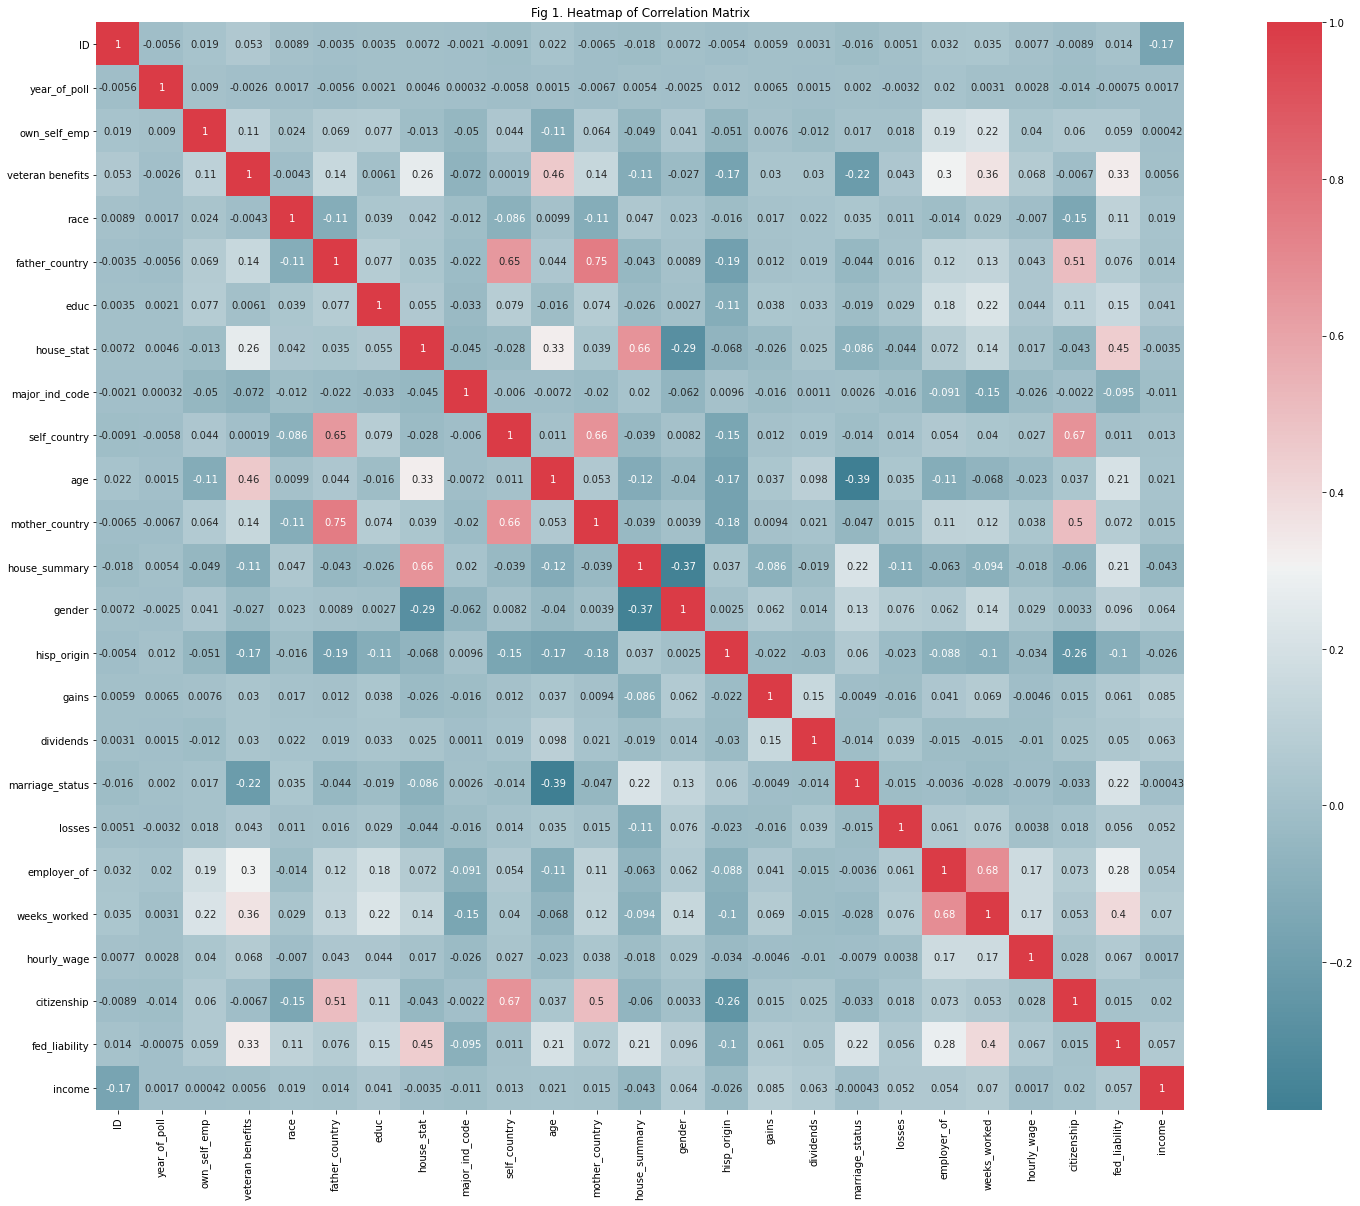

In [325]:
f, ax = plt.subplots(figsize=(30,20))
corr = le_train_dd.corr()
plt.title('Fig 1. Heatmap of Correlation Matrix')
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, annot = True)

In [326]:
model=PCA(n_components=2)
model_data=model.fit(le_train_dd.drop(['ID','income'],axis=1)).transform(le_train_dd.drop(['ID','income'],axis=1))

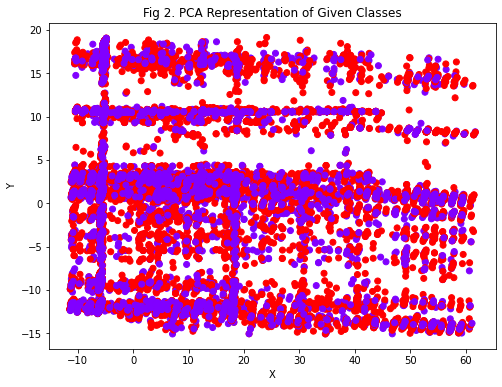

In [328]:
plt.figure(figsize=(8,6))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fig 2. PCA Representation of Given Classes')
plt.scatter(model_data[:,0],model_data[:,1],c=le_train_dd['income'],cmap = plt.get_cmap('rainbow_r'))

### Feature Selection using Importance Values

In [329]:
cols = list(le_train_dd.columns)
cols.remove('ID')
cols.remove('income')
X = le_train_dd[cols]
y = le_train_dd['income']

In [331]:
y.value_counts()

0    49185
1    32291
Name: income, dtype: int64

In [335]:
best_model=[]
best_roc = 0
for n in [100,250,500]: 
    clf3 = AdaBoostClassifier(n_estimators=n,random_state=42)
    clf3.fit(X_train,y_train)
    optimized_predictions = clf3.predict(X_test) 
    auc_op = roc_auc_score(y_test, optimized_predictions)*100 
    if auc_op>best_roc: 
        best_clf=clf3 
        best_roc=auc_op 
best_model.append(best_clf)
best_roc = 0    
for n in [100,250,500]: 
    for d in [18,20,22]:
        clf4 = RandomForestClassifier(n_estimators=n,max_depth=d,random_state=42)
        clf4.fit(X_train,y_train)
        optimized_predictions1 = clf4.predict(X_test)
        auc_op = roc_auc_score(y_test, optimized_predictions1)*100 
        if auc_op>best_roc:
            best_clf1=clf4
            best_roc=auc_op
best_model.append(best_clf1)

In [336]:
for i in best_model:
    print(i)

AdaBoostClassifier(n_estimators=500, random_state=42)
RandomForestClassifier(max_depth=22, n_estimators=250, random_state=42)


In [339]:
adb_importances = []
rf_importances = []

print("="*50)
clf5 = AdaBoostClassifier(n_estimators=500,random_state=42)
clf5.fit(X_train,y_train)
y_pred = clf5.predict(X_test)
print("ROC_AUC",roc_auc_score(y_test,y_pred))
adb_importances.append(clf5.feature_importances_)

print("="*50)
clf6 = RandomForestClassifier(n_estimators=250,max_depth=22,random_state=42)
clf6.fit(X_train,y_train)
y_pred = clf6.predict(X_test)
print("ROC_AUC",roc_auc_score(y_test,y_pred))
rf_importances.append(clf6.feature_importances_)

ROC_AUC 0.9623085463196275
ROC_AUC 0.9489841447346656


In [340]:
importances = adb_importances + rf_importances
importance = np.mean(importances,axis=0)

In [341]:
dictionary = dict((key,value) for (key,value)in zip(X.columns,importance))

In [342]:
X.columns

Index(['year_of_poll', 'own_self_emp', 'veteran benefits', 'race',
       'father_country', 'educ', 'house_stat', 'major_ind_code',
       'self_country', 'age', 'mother_country', 'house_summary', 'gender',
       'hisp_origin', 'gains', 'dividends', 'marriage_status', 'losses',
       'employer_of', 'weeks_worked', 'hourly_wage', 'citizenship',
       'fed_liability'],
      dtype='object')

In [344]:
sorted_importances = (sorted(dictionary,key=lambda k:dictionary[k],reverse=True))
print(len(sorted_importances))

20


In [345]:
print(sorted_importances[:20])

['year_of_poll', 'house_summary', 'father_country', 'educ', 'weeks_worked', 'employer_of', 'house_stat', 'major_ind_code', 'age', 'dividends', 'self_country', 'hisp_origin', 'marriage_status', 'gender', 'mother_country', 'veteran benefits', 'gains', 'losses', 'own_self_emp', 'race']


### Classification

In [347]:
cols = sorted_importances[:20]
if('ID' in cols):
    cols.remove('ID')
X = le_train_dd[cols]
y = le_train_dd['income']

In [348]:
np.random.seed(42)

In [349]:
y.value_counts()

0    49185
1    32291
Name: income, dtype: int64

In [350]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

### Naive Bayes

In [353]:
nb3 = GaussianNB()
scorer = make_scorer(roc_auc_score)
cv_results = cross_validate(nb3, X, y, cv=10, scoring=(scorer), return_train_score=True)
print (cv_results.keys())
print("Train ROC_AUC for 10 folds= ",np.mean(cv_results['train_score']))
print("Validation ROC_AUC for 10 folds = ",np.mean(cv_results['test_score']))

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Train ROC_AUC for 10 folds=  0.5288433204132745
Validation ROC_AUC for 10 folds =  0.5288776127503053


In [355]:
nb3.fit(X_train,y_train)
y_pred = nb3.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75     14763
           1       0.61      0.10      0.17      9680

    accuracy                           0.62     24443
   macro avg       0.61      0.53      0.46     24443
weighted avg       0.61      0.62      0.52     24443



### Logistic Regression

In [377]:
train_roc = []
test_roc = []
Cval = [0.01,0.1,1,10]
for i in Cval:
    lg = LogisticRegression(C=i)
    lg.fit(X_train,y_train)
    roc_auc_train = roc_auc_score(y_train,lg.predict(X_train))
    train_roc.append(roc_auc_train)
    roc_auc_test = roc_auc_score(y_val,lg.predict(X_val))
    test_roc.append(roc_auc_test)

Text(0, 0.5, 'ROC_AUC_Score')

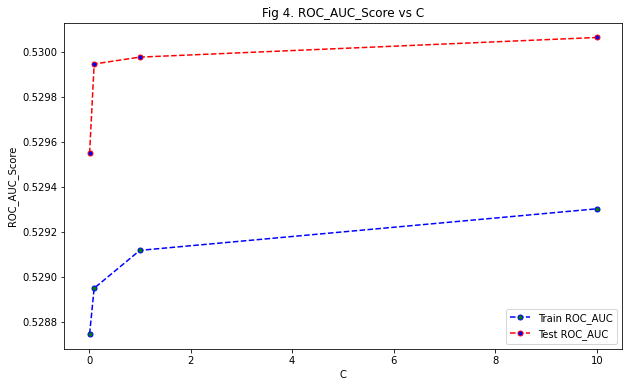

In [378]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(Cval,train_roc,color='blue', linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
test_score,=plt.plot(Cval,test_roc,color='red',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
plt.legend( [train_score, test_score],["Train ROC_AUC", "Test ROC_AUC"])
plt.title('Fig 4. ROC_AUC_Score vs C')
plt.xlabel('C')
plt.ylabel('ROC_AUC_Score')

In [379]:
lg = LogisticRegression(C=1)
scorer = make_scorer(roc_auc_score)
cv_results = cross_validate(lg, X, y, cv=10, scoring=(scorer), return_train_score=True)
print (cv_results.keys())
print("Train ROC_AUC for 10 folds= ",np.mean(cv_results['train_score']))
print("Validation ROC_AUC for 10 folds = ",np.mean(cv_results['test_score']))

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Train ROC_AUC for 10 folds=  0.5297358855290384
Validation ROC_AUC for 10 folds =  0.5293121013024316


### Decision Tree

In [380]:
train_roc = []
test_roc = []
for i in range(1,21):
    dt = DecisionTreeClassifier(max_depth=i,random_state=42)
    dt.fit(X_train,y_train)
    roc_auc_train = roc_auc_score(y_train,dt.predict(X_train))
    train_roc.append(roc_auc_train)
    roc_auc_test = roc_auc_score(y_val,dt.predict(X_val))
    test_roc.append(roc_auc_test)

Text(0, 0.5, 'ROC_AUC_Score')

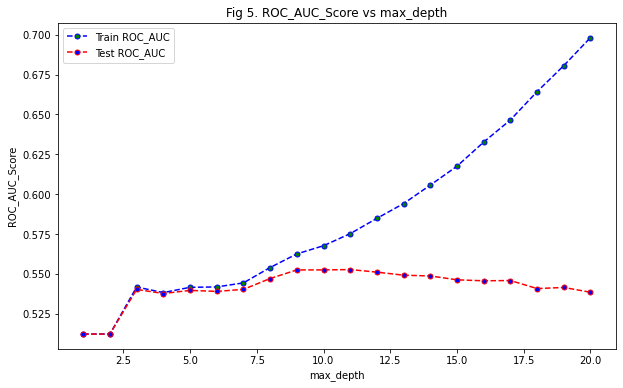

In [381]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,21),train_roc,color='blue', linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,21),test_roc,color='red',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
plt.legend( [train_score, test_score],["Train ROC_AUC", "Test ROC_AUC"])
plt.title('Fig 5. ROC_AUC_Score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('ROC_AUC_Score')

In [382]:
train_roc = []
test_roc = []
for i in range(2,31):
    dt = DecisionTreeClassifier(max_depth=7,min_samples_split=i,random_state=42)
    dt.fit(X_train,y_train)
    roc_auc_train = roc_auc_score(y_train,dt.predict(X_train))
    train_roc.append(roc_auc_train)
    roc_auc_test = roc_auc_score(y_val,dt.predict(X_val))
    test_roc.append(roc_auc_test)

Text(0, 0.5, 'ROC_AUC_Score')

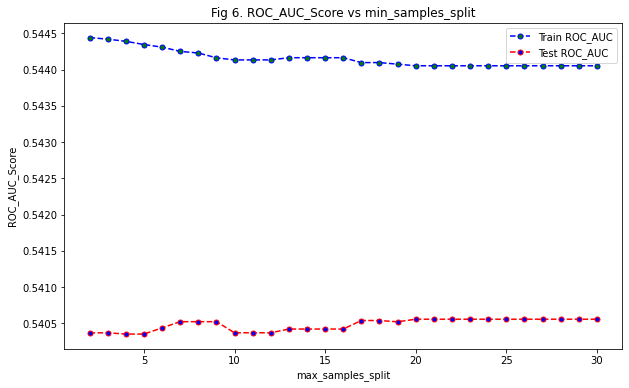

In [383]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(2,31),train_roc,color='blue', linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(2,31),test_roc,color='red',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
plt.legend( [train_score, test_score],["Train ROC_AUC", "Test ROC_AUC"])
plt.title('Fig 6. ROC_AUC_Score vs min_samples_split')
plt.xlabel('max_samples_split')
plt.ylabel('ROC_AUC_Score')

In [385]:
from sklearn.model_selection import GridSearchCV
dt_temp = DecisionTreeClassifier() #Initialize the classifier object
parameters = {'max_depth':[4,5,7,9],'min_samples_split':[5,10,15,20,22]} #Dictionary of parameters
scorer = make_scorer(roc_auc_score) #Initialize the scorer using make_scorer
grid_obj = GridSearchCV(dt_temp, parameters, scoring=scorer) #Initialize a GridSearchCV object with above parameters,scorer and classifier
grid_fit = grid_obj.fit(X_train, y_train) #Fit the gridsearch object with X_train,y_train
best_rf = grid_fit.best_estimator_ #Get the best estimator. For this, check documentation of GridSearchCV object
print(grid_fit.best_params_)

{'max_depth': 9, 'min_samples_split': 22}


In [387]:
dt = DecisionTreeClassifier(max_depth=9,min_samples_split=22)
scorer = make_scorer(roc_auc_score)
cv_results = cross_validate(dt, X, y, cv=10, scoring=(scorer), return_train_score=True)
print (cv_results.keys())
print("Train ROC_AUC for 10 folds= ",np.mean(cv_results['train_score']))
print("Validation ROC_AUC for 10 folds = ",np.mean(cv_results['test_score']))

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Train ROC_AUC for 10 folds=  0.5594831816106527
Validation ROC_AUC for 10 folds =  0.5505370023703515


### Random Forest

In [388]:
rf_temp = RandomForestClassifier(n_estimators = 250) #Initialize the classifier object
parameters = {'max_depth':[10,15,20,25,30],'min_samples_split':[2, 3, 4, 5]} #Dictionary of parameters
scorer = make_scorer(roc_auc_score) #Initialize the scorer using make_scorer
grid_obj = GridSearchCV(rf_temp, parameters, scoring=scorer) #Initialize a GridSearchCV object with above parameters,scorer and classifier
grid_fit = grid_obj.fit(X_train, y_train) #Fit the gridsearch object with X_train,y_train
best_rf = grid_fit.best_estimator_ #Get the best estimator. For this, check documentation of GridSearchCV object
print(grid_fit.best_params_)

{'max_depth': 15, 'min_samples_split': 3}


In [389]:
rf = RandomForestClassifier(n_estimators = 250,max_depth=15,min_samples_split=3)
scorer = make_scorer(roc_auc_score)
cv_results = cross_validate(rf, X, y, cv=10, scoring=(scorer), return_train_score=True)
print (cv_results.keys())
print("Train ROC_AUC for 10 folds= ",np.mean(cv_results['train_score']))
print("Validation ROC_AUC for 10 folds = ",np.mean(cv_results['test_score']))

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Train ROC_AUC for 10 folds=  0.5990588001511098
Validation ROC_AUC for 10 folds =  0.5525062485731458


### Adaboost

In [390]:
adb_temp = AdaBoostClassifier(random_state=42) #Initialize the classifier object
parameters = {'n_estimators':[250,300,500,600]} #Dictionary of parameters
scorer = make_scorer(roc_auc_score) #Initialize the scorer using make_scorer
grid_obj = GridSearchCV(adb_temp, parameters, scoring=scorer) #Initialize a GridSearchCV object with above parameters,scorer and classifier
grid_fit = grid_obj.fit(X_train, y_train) #Fit the gridsearch object with X_train,y_train
best_rf = grid_fit.best_estimator_ #Get the best estimator. For this, check documentation of GridSearchCV object
print(grid_fit.best_params_)

{'n_estimators': 600}


In [391]:
adb = AdaBoostClassifier(n_estimators = 600,random_state=42)
scorer = make_scorer(roc_auc_score)
cv_results = cross_validate(adb, X, y, cv=10, scoring=(scorer), return_train_score=True)
print (cv_results.keys())
print("Train ROC_AUC for 10 folds= ",np.mean(cv_results['train_score']))
print("Validation ROC_AUC for 10 folds = ",np.mean(cv_results['test_score']))

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Train ROC_AUC for 10 folds=  0.5556573105996894
Validation ROC_AUC for 10 folds =  0.5520592643859836


### Fitting test data

In [393]:
le_test.head()

,ID,year_of_poll,own_self_emp,veteran benefits,race,father_country,educ,house_stat,major_ind_code,self_country,...,hisp_origin,gains,dividends,marriage_status,losses,employer_of,weeks_worked,hourly_wage,citizenship,fed_liability
0,105000,0.999391,-0.318189,0.567847,2,39,16,16,11,39,...,4,-0.092427,-0.096031,5,-0.135534,1.713442,1.184200,-0.202694,3,4
1,105001,-1.000610,-0.318189,0.567847,2,39,9,18,12,39,...,4,-0.092427,-0.048062,6,-0.135534,1.713442,1.184200,-0.202694,3,2
2,105002,-1.000610,-0.318189,0.567847,2,39,5,17,14,39,...,4,-0.092427,-0.096031,2,-0.135534,-0.826908,-0.948135,-0.202694,3,1
3,105003,-1.000610,3.281230,0.567847,2,39,12,28,11,39,...,4,-0.092427,-0.096031,6,-0.135534,0.019875,1.184200,-0.202694,3,2
4,105004,-1.000610,-0.318189,0.567847,2,19,11,16,18,19,...,4,-0.092427,-0.096031,2,-0.135534,1.713442,1.184200,-0.202694,1,2


In [400]:
cols = sorted_importances[:20]
if('ID' in cols):
    cols.remove('ID')
doc3_test_set = le_test[cols]
doc3_test_set.shape

(42000, 20)

In [404]:
adb_imp_feature = AdaBoostClassifier(n_estimators = 600,random_state=42)
adb_imp_feature.fit(X_train ,y_train)
y_pred_adb_imp_feature = adb_imp_feature.predict(doc3_test_set)

In [411]:
data3_test_final = pd.read_csv("C:/Users/sanli/Desktop/Sandeep/Vokesdigital/test.csv", sep=',')

In [413]:
zero=0
one=0
for i in range(0,len(y_pred_adb_imp_feature)):
    if(y_pred_adb_imp_feature[i]==0):
        zero=zero+1
    else:
        one=one+1
print(zero)
print(one)

38931
3069


In [414]:
dataf = data2_test_final['ID']
res1 = pd.DataFrame(y_pred_adb_imp_feature)
final = pd.concat([data2_test_final["ID"], res1], axis=1).reindex()
final = final.rename(columns={0: "income"})
len(final)


final.to_csv('C:/Users/sanli/Desktop/Sandeep/Vokesdigital/submission3.csv', index = False)


## Trying another approach

In [993]:
data4_train.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

In [994]:
data4_train['income']= data4_train['income'].map({'Less than 50K $': 0, 'More than 50K $': 1})
data4_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1


In [995]:

data4_test.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,College/University,White,United-States,Some college but no degree,Householder,Manufacturing-nondurable goods,...,NaN,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Full-time schedules
1,105001,2004,0,2,College/University,White,United-States,Bachelors degree(BA AB BS),Nonfamily householder,Medical except hospital,...,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
2,105002,2004,0,2,NaN,White,United-States,7th and 8th grade,In group quarters,Not in universe or children,...,Yes,NaN,0,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces
3,105003,2004,2,2,NaN,White,United-States,High school graduate,Secondary individual,Manufacturing-nondurable goods,...,No,No,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
4,105004,2004,0,2,NaN,White,Iran,Doctorate degree(PhD EdD),Householder,Public administration,...,Yes,No,47,NaN,0.0,NaN,FB_US,Loc_Govt,Single,Children/Armed_Forces


In [996]:
data4_test['full_partime_job'].value_counts()

Children/Armed_Forces                  25659
 Full-time schedules                    8581
 Not in labor force                     5528
 PT for non-econ reasons usually FT      677
 Unemployed full-time                    477
 PT for econ reasons usually PT          255
 Unemployed part- time                   168
 PT for econ reasons usually FT           87
Name: full_partime_job, dtype: int64

In [997]:
data4_train.isnull().sum()

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled     31443
race                       0
father_country             0
educ                       0
house_stat                11
major_ind_code             0
labour_union           35331
self_country               0
major_occ_code         53055
age                        0
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          53322
income_filled          32403
weeks_worked               0
under18                76016
hourly_wage                0
unemp_reason          101811
citizenship                0
woker_type             52835
fed_liability              0
full_partime_job        1392
income                     0
dtype: int64

In [998]:
data4_test.isnull().sum()

ID                        0
year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled    12613
race                      0
father_country            0
educ                      0
house_stat                3
major_ind_code            0
labour_union          14337
self_country              0
major_occ_code        21068
age                     596
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago         21398
income_filled         13008
weeks_worked              0
under18               30340
hourly_wage               0
unemp_reason          40715
citizenship               0
woker_type            20977
fed_liability             0
full_partime_job        568
dtype: int64

In [999]:
non_null_ints1 = ['age','gains','dividends', 'losses','weeks_worked',
                'hourly_wage','income']

test_cols1 = ['age','gains','dividends', 'losses','weeks_worked',
                'hourly_wage']

In [1000]:
data4_train_subset = data4_train[non_null_ints]

In [1002]:
data4_test_subset = data4_test[test_cols]

In [1003]:
encode = [ 'educ','gender','major_ind_code','woker_type','income_filled','major_occ_code','full_partime_job']
#encode = [ 'educ','race','marriage_status','gender','full_partime_job','citizenship','fed_liability','woker_type']

In [1004]:
from sklearn.preprocessing import LabelEncoder

In [1005]:
data4_train['full_partime_job'].value_counts()

Children/Armed_Forces                  64168
 Full-time schedules                   21083
 Not in labor force                    14051
 PT for non-econ reasons usually FT     1737
 Unemployed full-time                   1185
 PT for econ reasons usually PT          654
 Unemployed part- time                   450
 PT for econ reasons usually FT          280
Name: full_partime_job, dtype: int64

In [1006]:
for col in encode:
    print(col)
    le = LabelEncoder()
    le.fit(data4_train[col])
    
    data4_train_subset[col] = le.transform(data4_train[col])
    data4_test_subset[col] = le.transform(data4_test[col])



educ
gender
major_ind_code
woker_type
income_filled
major_occ_code
full_partime_job


In [1007]:
y4=data4_train_subset['income']

In [1008]:
xtrain4=data4_train_subset.drop(columns=['income'])

In [1009]:
X_train,X_test,y_train,y_test=train_test_split(xtrain4,y4,random_state=10,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


In [1010]:
from sklearn.tree import DecisionTreeClassifier
dTree4 = DecisionTreeClassifier(max_depth=6, random_state = 42)
dTree4.fit(X_train,y_train)
dTree4.score(X_test,y_test)


0.9539047619047619

In [1011]:
y_pred_DT4 = dTree4.predict(X_test)
print(confusion_matrix(y_test, y_pred_DT4))

print(classification_report(y_test, y_pred_DT4))


[[12949    29]
 [  939  7083]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12978
           1       1.00      0.88      0.94      8022

    accuracy                           0.95     21000
   macro avg       0.96      0.94      0.95     21000
weighted avg       0.96      0.95      0.95     21000



In [1012]:
from sklearn.ensemble import RandomForestClassifier
rf4 = RandomForestClassifier(n_estimators=16, class_weight="balanced", random_state = 42)
rf4.fit(X_train, y_train)
print(rf4.score(X_test,y_test))
y_pred_RF4 = rf4.predict(X_test)
print(classification_report(y_test, y_pred_RF4))


0.9583333333333334
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12978
           1       0.98      0.91      0.94      8022

    accuracy                           0.96     21000
   macro avg       0.96      0.95      0.96     21000
weighted avg       0.96      0.96      0.96     21000



In [1013]:
clf4=AdaBoostClassifier(n_estimators = 3, base_estimator=rf4, algorithm = "SAMME.R")

clf4.fit(X_train ,y_train)
print(clf4.score(X_test,y_test))
y_pred_clf4 = clf4.predict(X_test)
print(classification_report(y_test, y_pred_clf4))


0.957
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12978
           1       0.98      0.91      0.94      8022

    accuracy                           0.96     21000
   macro avg       0.96      0.95      0.95     21000
weighted avg       0.96      0.96      0.96     21000



In [1014]:
clf5=AdaBoostClassifier(n_estimators = 3, base_estimator=dTree4)

clf5.fit(X_train ,y_train)
print(clf5.score(X_test,y_test))
y_pred_clf5 = clf5.predict(X_test)
print(classification_report(y_test, y_pred_clf5))


0.9659047619047619
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12978
           1       0.98      0.93      0.95      8022

    accuracy                           0.97     21000
   macro avg       0.97      0.96      0.96     21000
weighted avg       0.97      0.97      0.97     21000



### Filling test data

In [1015]:
data4_test_subset.head()

,ID,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,educ,gender,major_ind_code,woker_type,income_filled,major_occ_code,full_partime_job
0,105000,2005,0,2,32.0,0.0,0.0,0.0,6,47,0.0,16,1,11,4,0,7,0
1,105001,2004,0,2,51.0,0.0,120.0,0.0,6,47,0.0,9,0,12,4,2,9,7
2,105002,2004,0,2,70.0,0.0,0.0,0.0,0,0,0.0,5,0,14,8,2,14,7
3,105003,2004,2,2,25.0,0.0,0.0,0.0,2,47,0.0,12,1,11,4,0,4,7
4,105004,2004,0,2,65.0,0.0,0.0,0.0,6,47,0.0,11,0,18,3,0,9,7


In [1016]:
data4_test_subset.fillna(data4_test_subset.mode().iloc[0], inplace=True)

In [1034]:
prediction_final_cl5 = clf5.predict(data4_test_subset)

In [1035]:
data5_test_final = pd.read_csv("C:/Users/sanli/Desktop/Sandeep/Vokesdigital/test.csv", sep=',')

In [1036]:
zero1=0
one1=0
for i in range(0,len(prediction_final_cl5)):
    if(prediction_final_cl5[i]==0):
        zero1=zero1+1
    else:
        one1=one1+1
print(zero1)
print(one1)


15
41985


In [1037]:
datafinal = data5_test_final['ID']
res3 = pd.DataFrame(prediction_final_cl5)
final = pd.concat([data5_test_final["ID"], res3], axis=1).reindex()
final = final.rename(columns={0: "income"})
len(final)

final.to_csv('C:/Users/sanli/Desktop/Sandeep/Vokesdigital/submission6.csv', index = False)
